In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/Samsung_SNH_1011_N_Webcam.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000       70.000000            0.000000          1.000000   
2          1.000008       89.999836            0.003289          1.000889   
3          1.000000      322.000000            0.000000          1.000000   
4          1.784845      328.723273           35.476876          1.864710   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1       70.000000            0.000000          1.000000       70.000000   
2       89.982231            0.355061          1.096162       88.245473   
3      322.000000            0.000000          1.000000      322.000000   
4      328.435318           35.810498          1.952701      328.145333   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...         1.00000     60.000000   
1            0.000000     1.000000  ...         1.00000     70.000000   
2           32.012169     1.000008  ...         1.00000     90.000000   
3            0.000000     1.000000  ...         1.00000    322.000000   
4           35.978878     1.784845  ...         1.86471    328.435318   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.000000                 0.0          0.0        1.000000     70.000000   
2     0.000000                 0.0          0.0        1.000000     90.000000   
3     0.000047                 0.0          0.0        1.000326    322.017985   
4     5.984187                 0.0          0.0        1.953012    328.153131   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     0.000000                 0.0          0.0  
2     0.000000                 0.0          0.0  
3     1.852404                 0.0          0.0  
4     6.127464                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
52145             False           False               False             False   
52146             False           False               False             False   
52147             False           False               False             False   
52148             False           False               False             False   
52149             False           False               False             False   

 

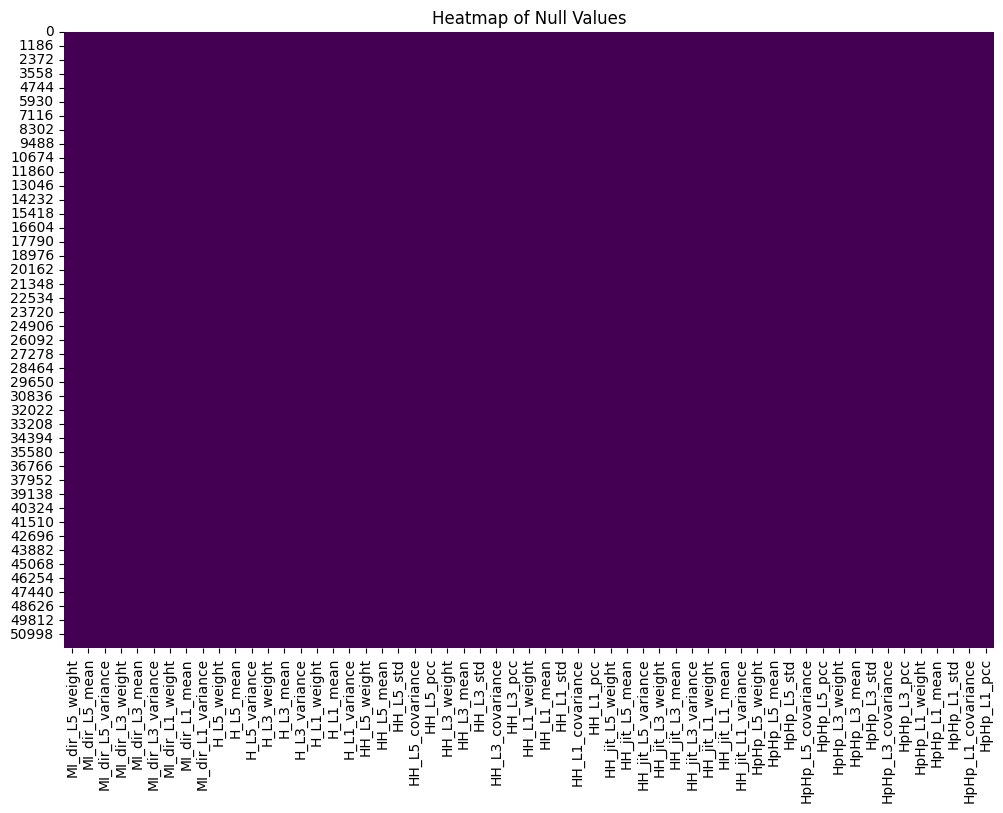

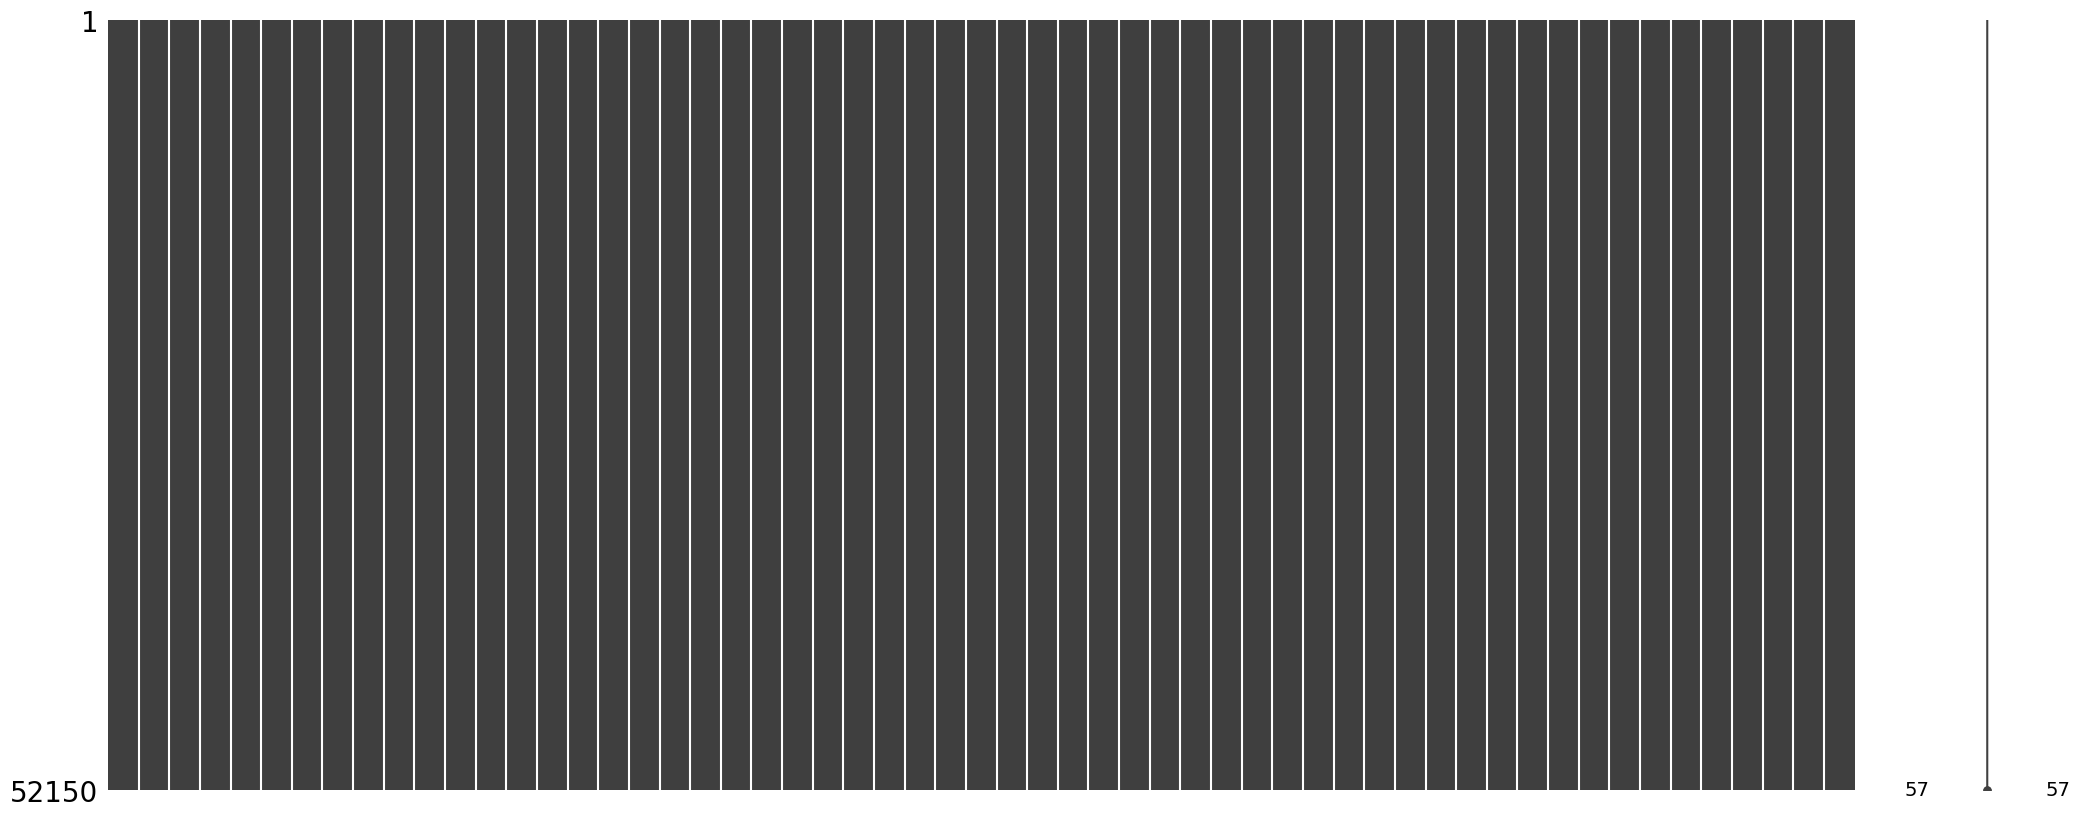

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      2.084856e+01
MI_dir_L5_mean        1.187194e+03
MI_dir_L5_variance    4.740364e+05
MI_dir_L3_weight      2.290428e+01
MI_dir_L3_mean        1.093288e+03
MI_dir_L3_variance    4.789816e+05
MI_dir_L1_weight      2.899452e+01
MI_dir_L1_mean        8.844159e+02
MI_dir_L1_variance    4.794172e+05
H_L5_weight           2.084856e+01
H_L5_mean             1.187194e+03
H_L5_variance         4.740364e+05
H_L3_weight           2.290428e+01
H_L3_mean             1.093288e+03
H_L3_variance         4.789816e+05
H_L1_weight           2.899452e+01
H_L1_mean             8.844159e+02
H_L1_variance         4.794172e+05
HH_L5_weight          2.082886e+01
HH_L5_mean            1.187194e+03
HH_L5_std             6.885030e+02
HH_L5_covariance      5.197690e+04
HH_L5_pcc             9.685769e-01
HH_L3_weight          2.280504e+01
HH_L3_mean            1.093288e+03
HH_L3_std             6.920850e+02
HH_L3_covariance      7.695085e+04
HH_L3_pcc             

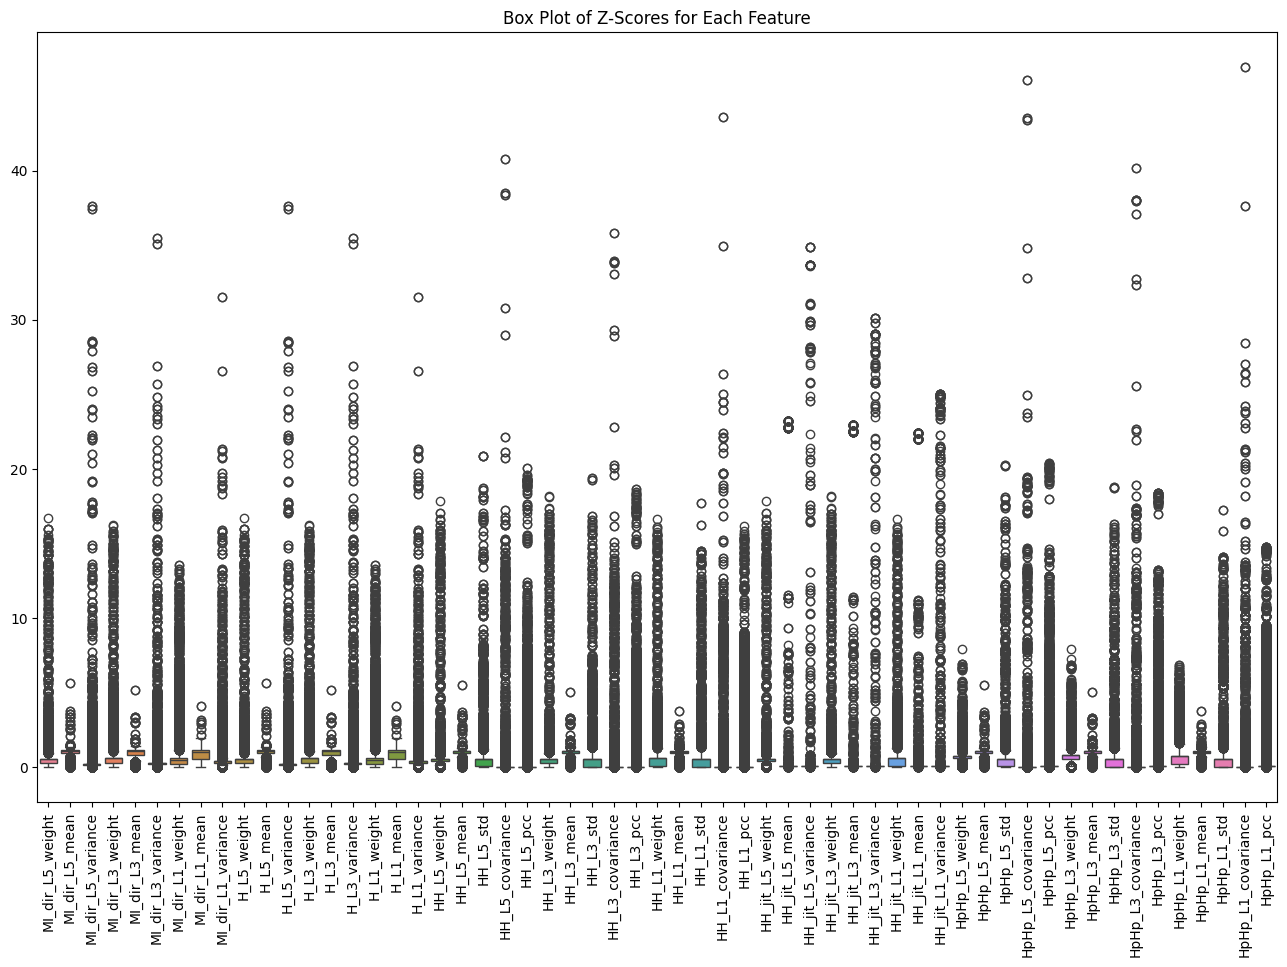

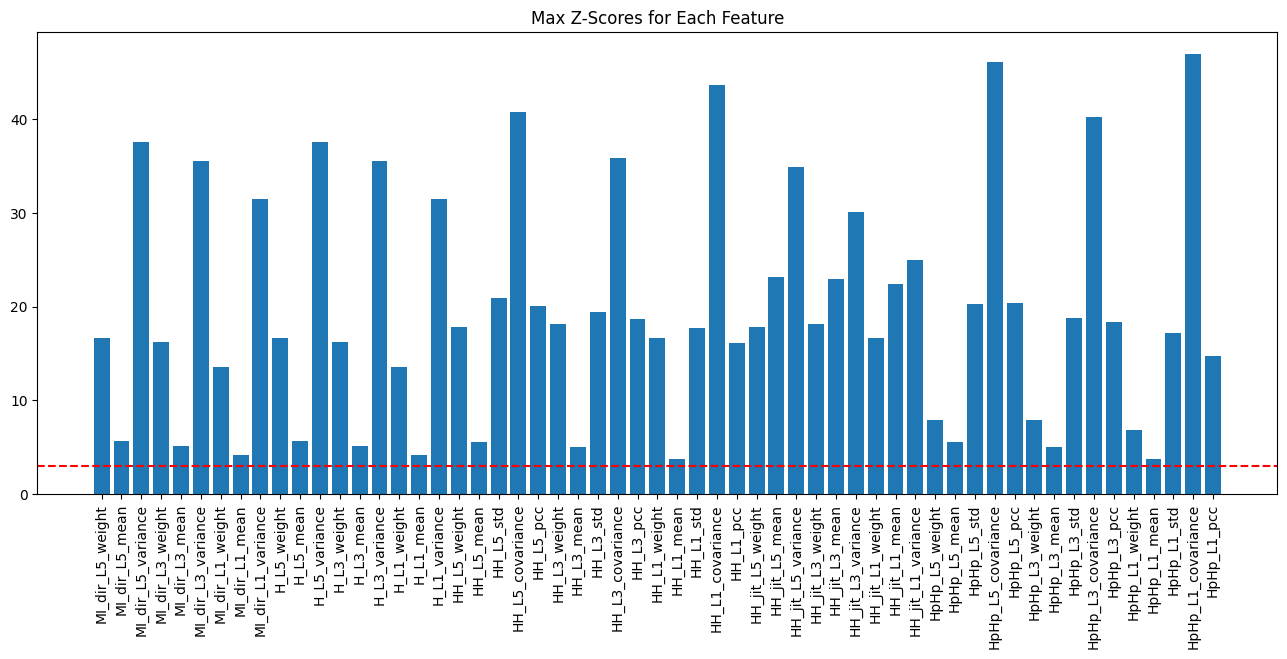

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 2900


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000       70.000000            0.000000          1.000000   
2          1.000008       89.999836            0.003289          1.000889   
5          1.000000      304.000000            0.000000          1.000000   
6          1.742504      163.971592        14558.976510          1.836410   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1       70.000000            0.000000          1.000000       70.000000   
2       89.982231            0.355061          1.096162       88.245473   
5      304.000000            0.000000          1.000000      304.000000   
6      171.132055        14765.887770          1.942193      178.368796   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...             1.0          60.0   
1            0.000000     1.000000  ...             1.0          70.0   
2           32.012169     1.000008  ...             1.0          90.0   
5            0.000000     1.000000  ...             1.0         304.0   
6        14870.814360     1.742504  ...             1.0          60.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0          0.0                 0.0          0.0             1.0          60.0   
1          0.0                 0.0          0.0             1.0          70.0   
2          0.0                 0.0          0.0             1.0          90.0   
5          0.0                 0.0          0.0             1.0         304.0   
6          0.0                 0.0          0.0             1.0          60.0   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0          0.0                 0.0          0.0  
1          0.0                 0.0          0.0  
2          0.0                 0.0          0.0  
5          0.0                 0.0          0.0  
6          0.0                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight       335
MI_dir_L5_mean          14
MI_dir_L5_variance     330
MI_dir_L3_weight       510
MI_dir_L3_mean          10
MI_dir_L3_variance     365
MI_dir_L1_weight       844
MI_dir_L1_mean           6
MI_dir_L1_variance     424
H_L5_weight            335
H_L5_mean               14
H_L5_variance          330
H_L3_weight            510
H_L3_mean               10
H_L3_variance          365
H_L1_weight            844
H_L1_mean                6
H_L1_variance          424
HH_L5_weight           244
HH_L5_mean              18
HH_L5_std              439
HH_L5_covariance       365
HH_L5_pcc              746
HH_L3_weight           260
HH_L3_mean              12
HH_L3_std              473
HH_L3_covariance       413
HH_L3_pcc              849
HH_L1_weight           427
HH_L1_mean               2
HH_L1_std              479
HH_L1_covariance       483
HH_L1_pcc             1023
HH_jit_L5_weight       244
HH_jit_L5_mean         160
HH_jit_L5_variance     

Number of outliers per feature:
MI_dir_L5_weight       335
MI_dir_L5_mean          14
MI_dir_L5_variance     330
MI_dir_L3_weight       510
MI_dir_L3_mean          10
MI_dir_L3_variance     365
MI_dir_L1_weight       844
MI_dir_L1_mean           6
MI_dir_L1_variance     424
H_L5_weight            335
H_L5_mean               14
H_L5_variance          330
H_L3_weight            510
H_L3_mean               10
H_L3_variance          365
H_L1_weight            844
H_L1_mean                6
H_L1_variance          424
HH_L5_weight           244
HH_L5_mean              18
HH_L5_std              439
HH_L5_covariance       365
HH_L5_pcc              746
HH_L3_weight           260
HH_L3_mean              12
HH_L3_std              473
HH_L3_covariance       413
HH_L3_pcc              849
HH_L1_weight           427
HH_L1_mean               2
HH_L1_std              479
HH_L1_covariance       483
HH_L1_pcc             1023
HH_jit_L5_weight       244
HH_jit_L5_mean         160
HH_jit_L5_variance     

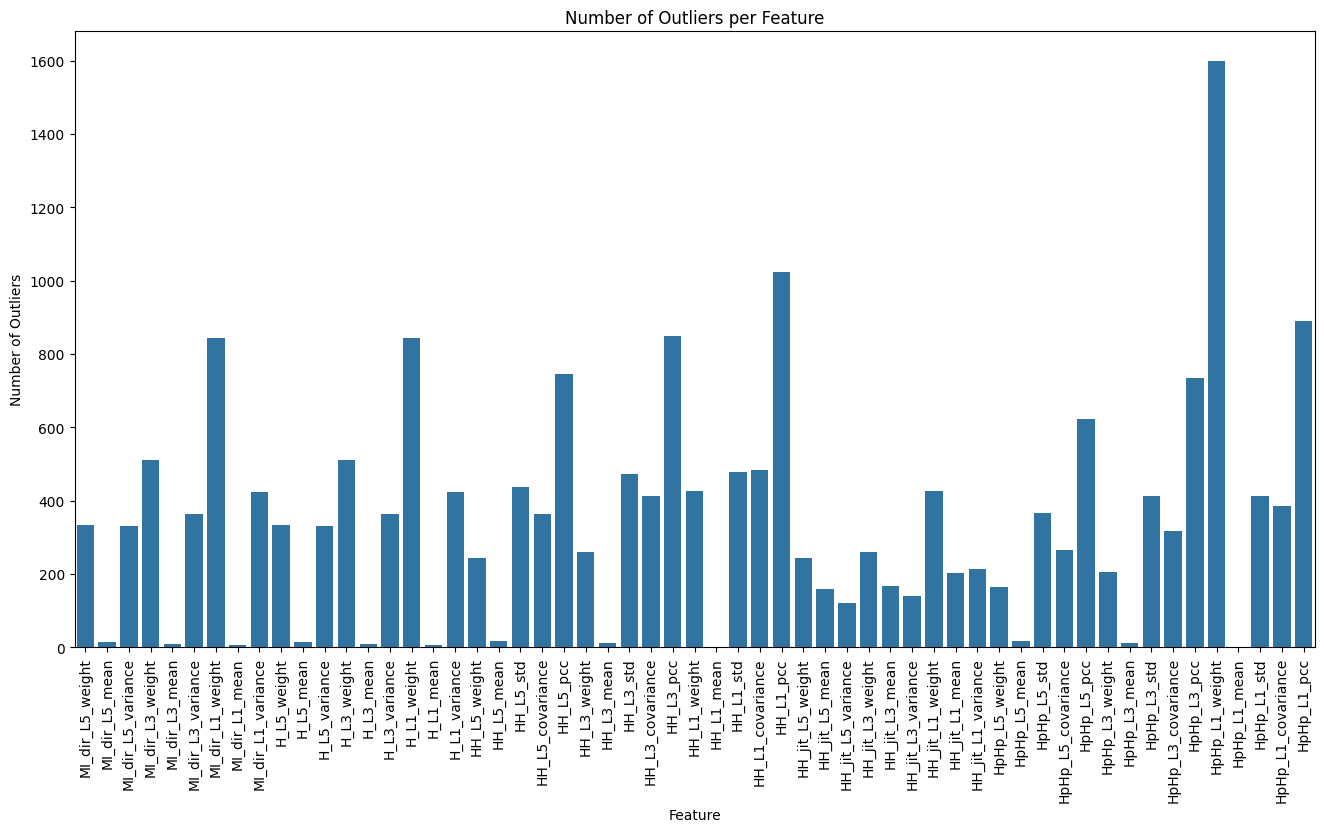

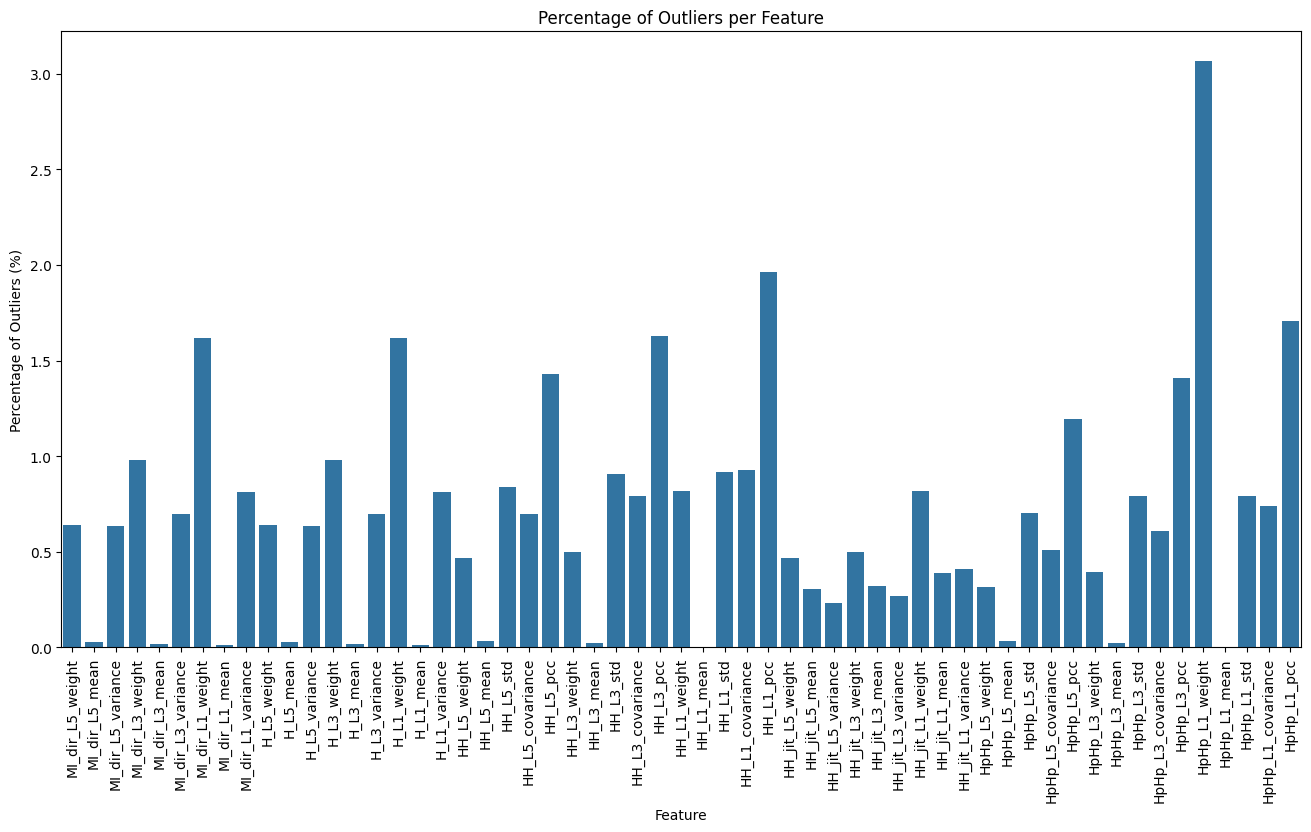

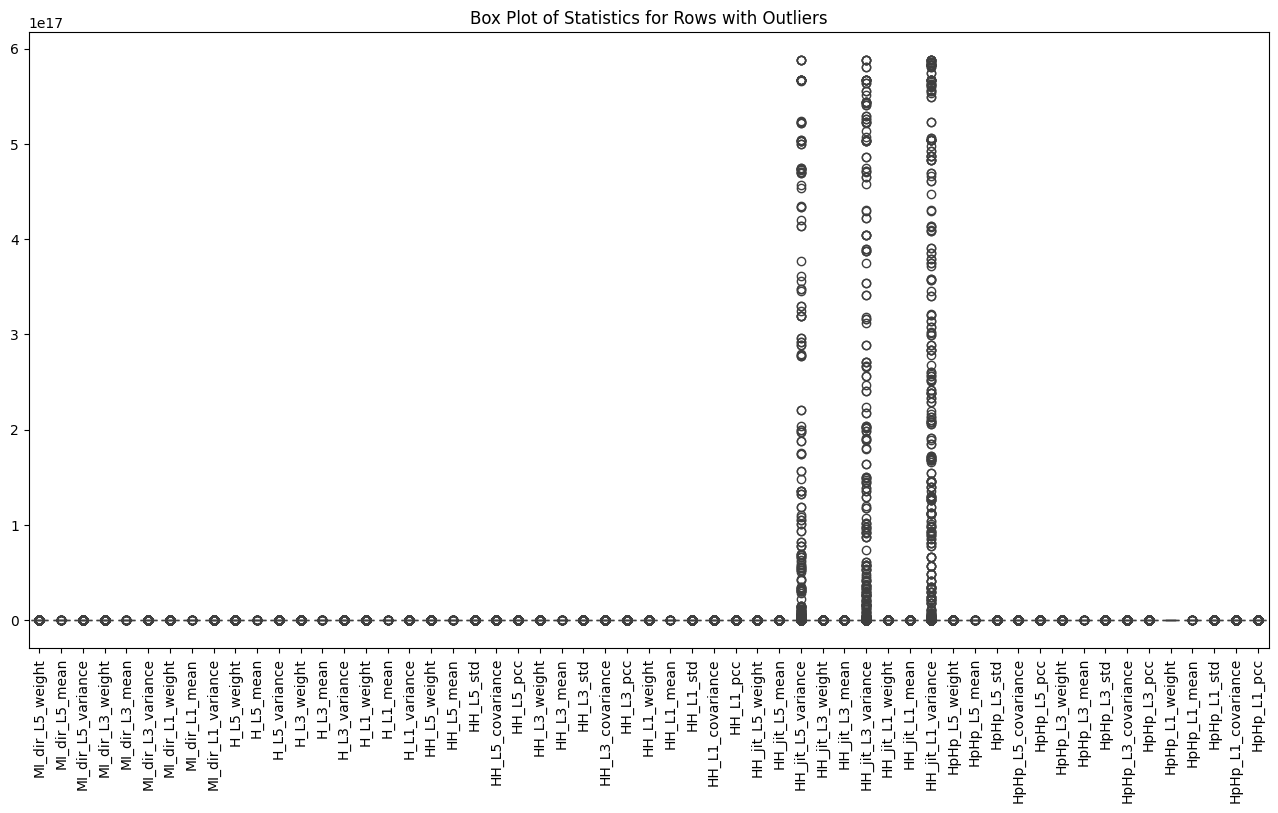

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (52150, 57)
Cleaned dataset shape: (49250, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
3           1.000000      322.000000        0.000000e+00          1.000000   
4           1.784845      328.723273        3.547688e+01          1.864710   
20          1.000000       90.000000        9.090000e-13          1.000000   
36          1.245384      128.174756        6.905350e+03          1.570549   
39          1.008562      228.351369        5.253923e+01          1.063534   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
3       322.000000        0.000000e+00          1.000000      322.000000   
4       328.435318        3.581050e+01          1.952701      328.145333   
20       90.000000        5.860000e-08          1.006008       89.989522   
36      154.880330        9.439252e+03          2.885502      181.785591   
39      225.006754        3.588786e+02  

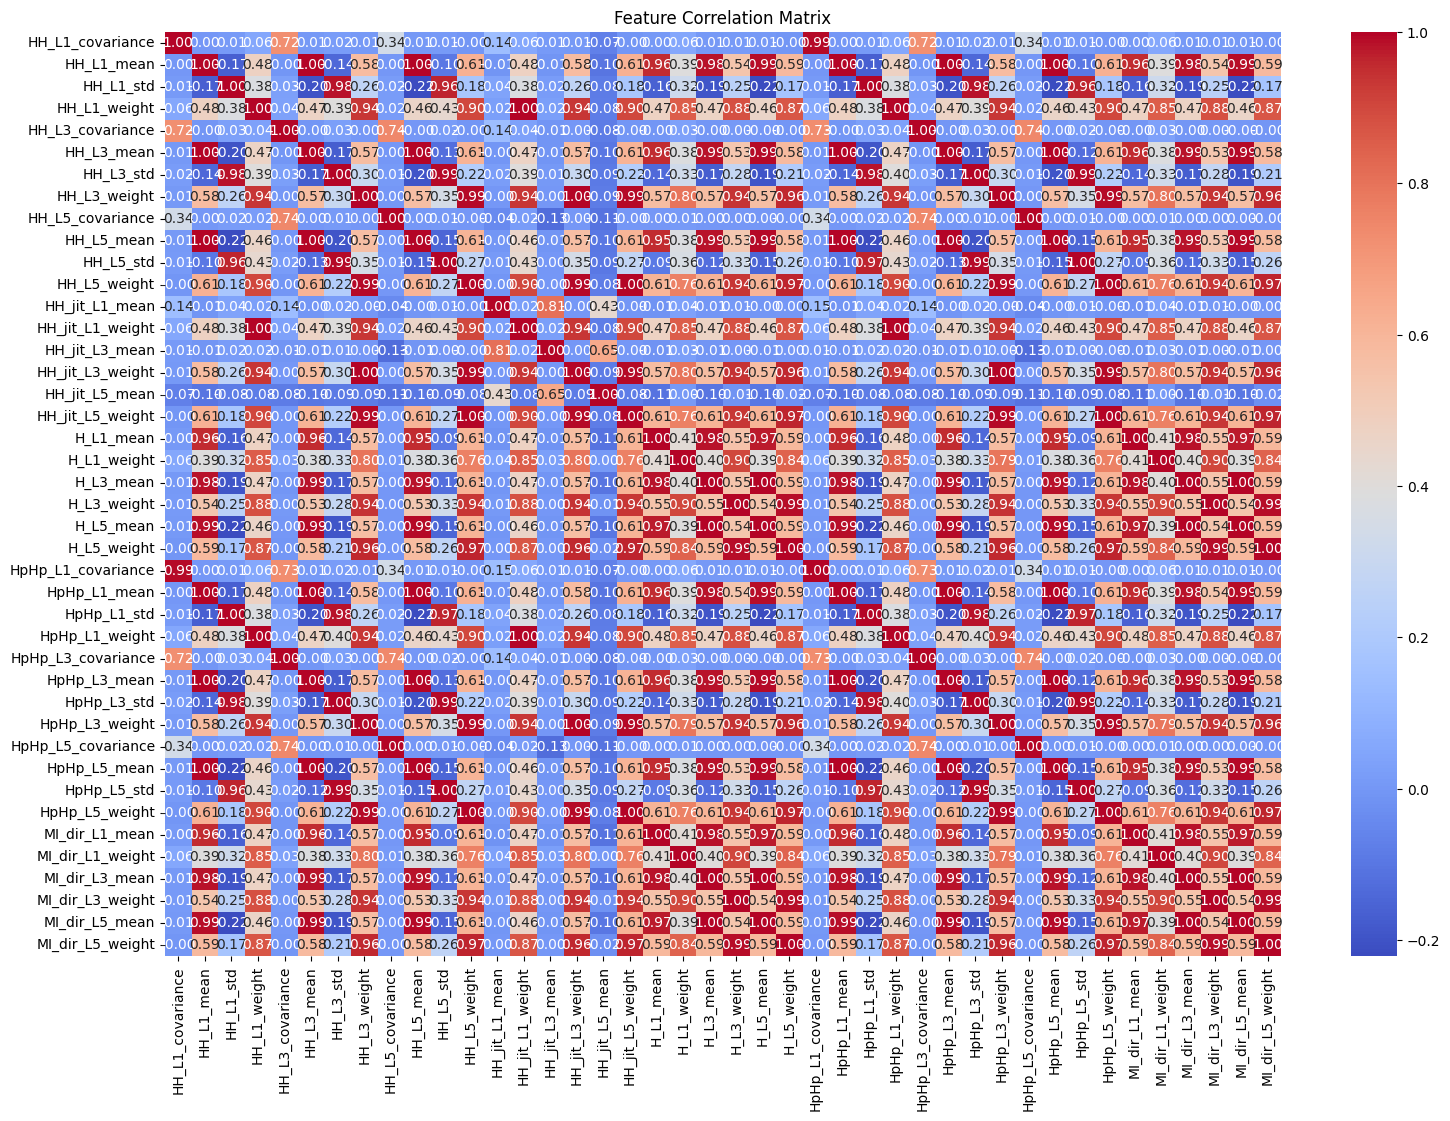

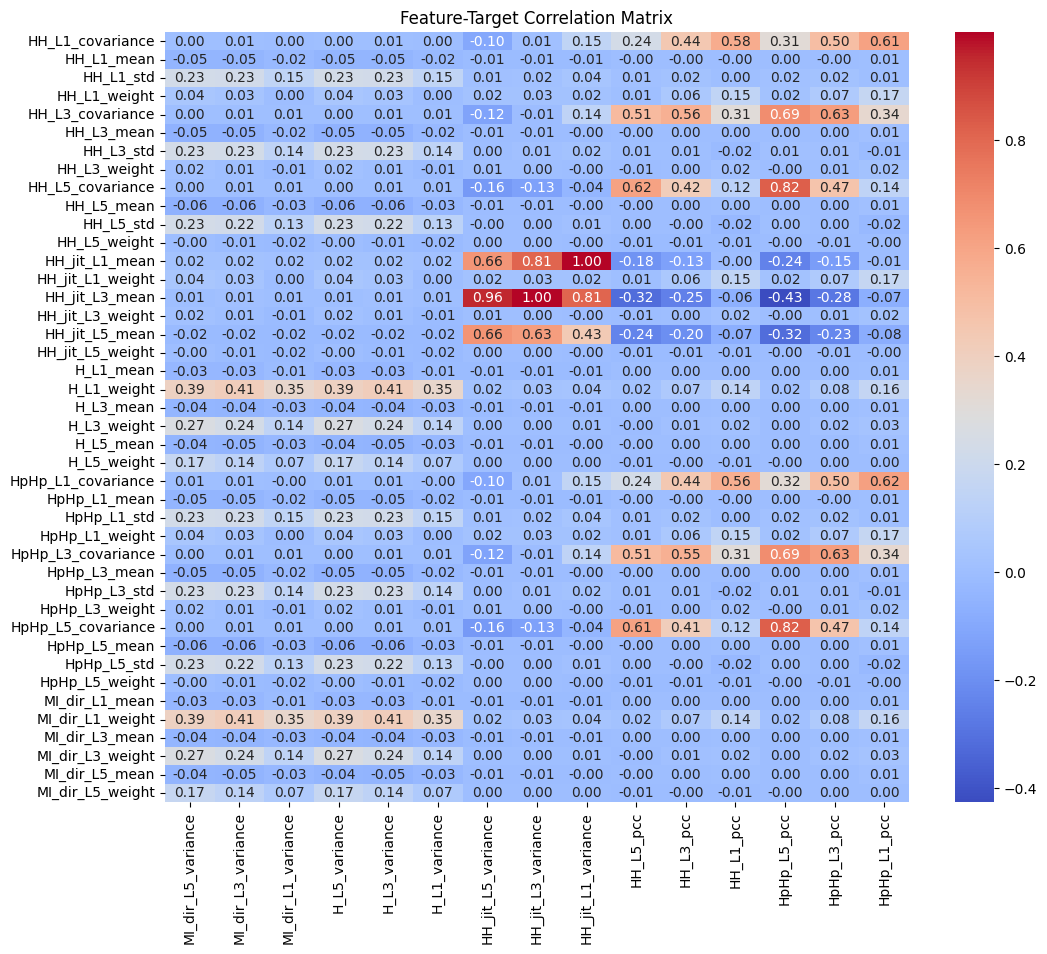

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      49250.000000  49250.000000  49250.000000  49250.000000   
mean           0.674445    283.623117     17.457797      1.644407   
std           62.178756    161.818920     24.071137      0.777148   
min        -3388.058872     60.000000      0.000000      1.000000   
25%            0.000000    125.239563      0.001771      1.000000   
50%            0.000000    204.000000      0.007048      1.162167   
75%            0.000000    449.006300     19.999999      1.999363   
max         6047.026035    499.999998    133.923807      5.051587   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      49250.000000  49250.000000  4.925000e+04  49250.000000   
mean           0.106925    280.961985  1.631512e+01      1.565685   
std            8.881705    164.704204  2.211795e+01      0.722972   
min         -281.381617     60.000000  0.000000e+00      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance    HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000  9.979203e-01   0.988409      0.944626   
HH_L1_mean                  0.997920  0.000000e+00   1.166706      0.522032   
HH_L1_std                   0.988409  1.166706e+00   0.000000      0.624233   
HH_L1_weight                0.944626  5.220321e-01   0.624233      0.000000   
HH_L3_covariance            0.275622  1.004642e+00   0.968422      0.964603   
HH_L3_mean                  0.993607  7.384849e-04   1.197359      0.532386   
HH_L3_std                   0.983842  1.141951e+00   0.016035      0.605047   
HH_L3_weight                0.992320  4.201846e-01   0.738399      0.062490   
HH_L5_covariance            0.661807  9.995460e-01   0.983047      0.984477   
HH_L5_mean                  0.992509  2.026682e-03   1.220878      0.540628   
HH_L5_std                   0.990218  1.095126e+00   0.035160      0.566940   
HH_L5_weight                1.00227

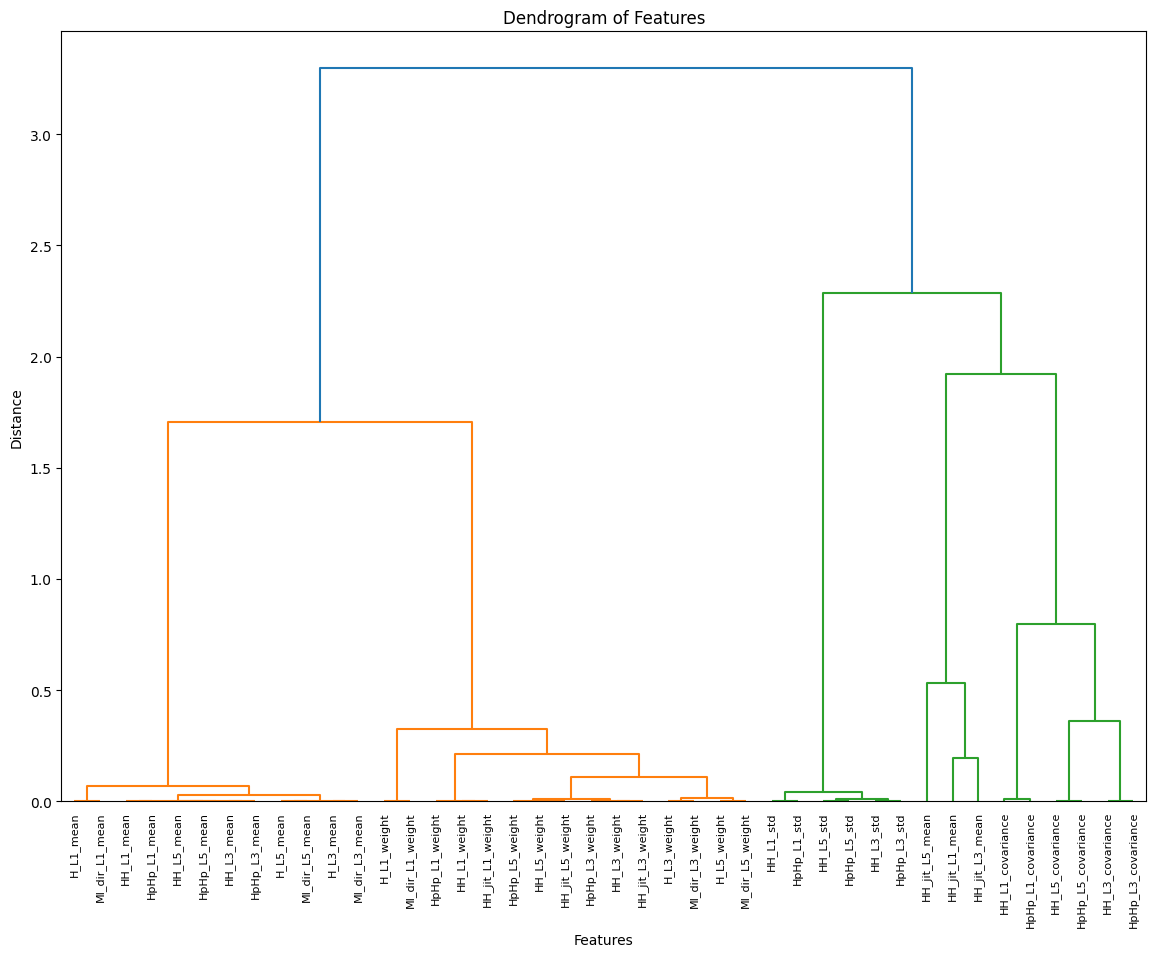

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
1        2  [HH_L1_weight, HH_L3_weight, HH_L5_weight, HH_...
2        3  [HH_L1_std, HH_L3_std, HH_L5_std, HpHp_L1_std,...
3        4   [HH_jit_L1_mean, HH_jit_L3_mean, HH_jit_L5_mean]
4        5             [HH_L1_covariance, HpHp_L1_covariance]
5        6  [HH_L3_covariance, HH_L5_covariance, HpHp_L3_c...


In [ ]:
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        3
1           HH_L1_mean        1
2            HH_L1_std        2
3         HH_L1_weight        1
4     HH_L3_covariance        3
5           HH_L3_mean        1
6            HH_L3_std        2
7         HH_L3_weight        1
8     HH_L5_covariance        3
9           HH_L5_mean        1
10           HH_L5_std        2
11        HH_L5_weight        1
12      HH_jit_L1_mean        3
13    HH_jit_L1_weight        1
14      HH_jit_L3_mean        3
15    HH_jit_L3_weight        1
16      HH_jit_L5_mean        3
17    HH_jit_L5_weight        1
18           H_L1_mean        1
19         H_L1_weight        1
20           H_L3_mean        1
21         H_L3_weight        1
22           H_L5_mean        1
23         H_L5_weight        1
24  HpHp_L1_covariance        3
25        HpHp_L1_mean        1
26         HpHp_L1_std        2
27      HpHp_L1_weight        1
28  HpHp_L3_covariance        3
29        HpHp_L3_mean        1
30      

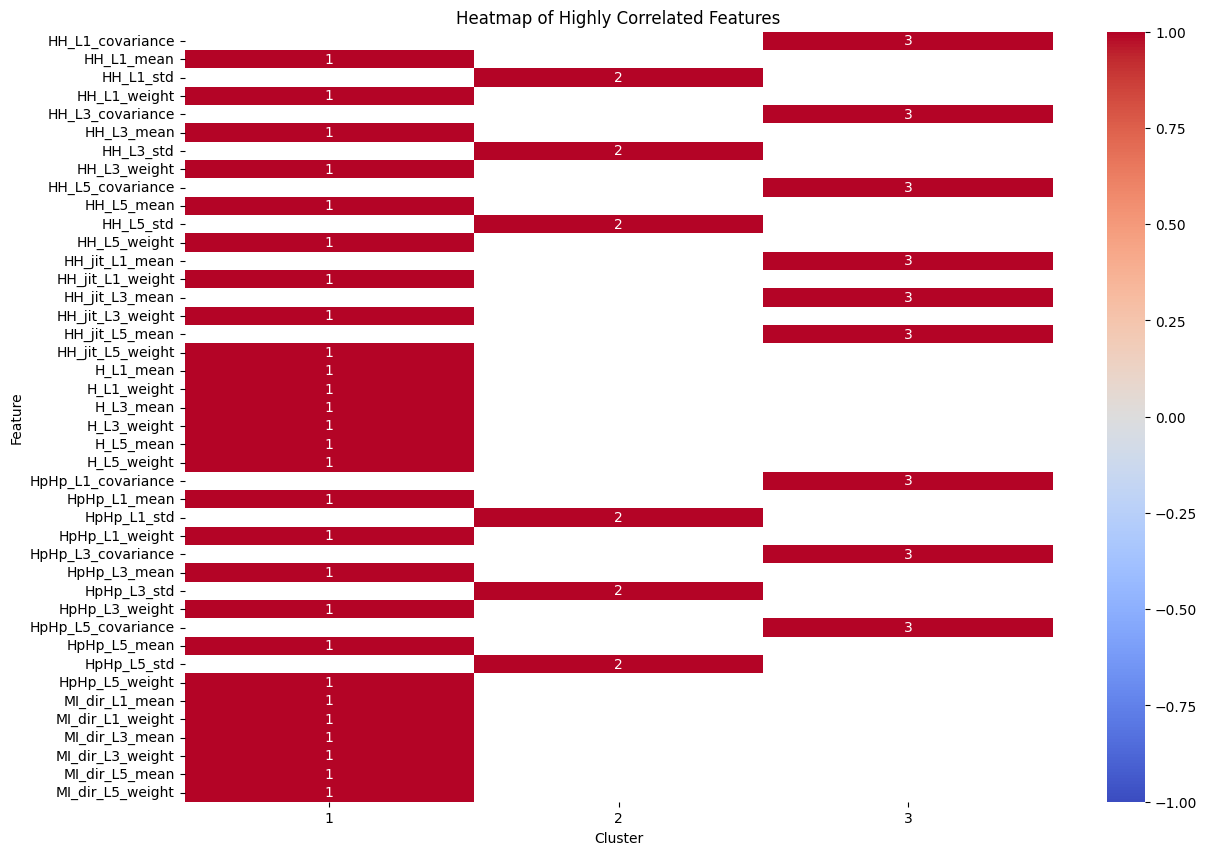

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.22808799 0.22301184 0.21962775 0.22165821 0.23455745]
Mean Cross-Validation Accuracy: 0.22538864830642064
Validation Set Performance:
Accuracy: 0.22685435841905793
Precision: 0.3445943124168543
Recall: 0.4897342458936662
F1-Score: 0.14665736346258504
Test Set Performance:
Accuracy: 0.22212295947372696
Precision: 0.34577661560857464
Recall: 0.48838588707061065
F1-Score: 0.14614214347825508

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.24196277 0.23637902 0.2321489  0.23299492 0.24488069]
Mean Cross-Validation Accuracy: 0.23767326161389074
Validation Set Performance:
Accuracy: 0.2390362750406064
Precision: 0.35220474322820544
Recall: 0.5275444279007111
F1-Score: 0.1661719908558222
Test Set Performance:
Accuracy: 0.23154389669455047
Precision: 0.3512557912005923
Recall: 0.47270790599938933
F1-Score: 0.1630971620129609


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.82047377 0.8071066  0.99813875 0.81556684 0.81181249]
Mean Cross-Validation Accuracy: 0.8506196890859364
Validation Set Performance:
Accuracy: 0.8130752571737954
Precision: 0.33322238863926334
Recall: 0.2710984745915696
F1-Score: 0.2989672763468956
Test Set Performance:
Accuracy: 0.8097945261106148
Precision: 0.36522279594568746
Recall: 0.6866485198125728
F1-Score: 0.35658884611173075

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99830795 0.99915398 0.99949239 0.99864636 0.99864613]
Mean Cross-Validation Accuracy: 0.9988493619672763
Validation Set Performance:
Accuracy: 0.9985110990795886
Precision: 0.46653112858046447
Recall: 0.6663505824979681
F1-Score: 0.5235836882178346
Test Set Performance:
Accuracy: 0.0005685048322910744
Precision: 0.5001083218241394
Recall: 0.6667208319792005
F1-Score: 0.22254710851630766

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.99712352 0.99813875 0.99847716 0.99813875 0.99729227]
Mean Cross-Validation Accuracy: 0.9978340877247389
Validation Set Performance:
Accuracy: 0.9981050351922036
Precision: 0.4848032564450475
Recall: 0.6107044968525045
F1-Score: 0.5291857453586263
Test Set Performance:
Accuracy: 0.0008933647364574028
Precision: 0.3962962962962963
Recall: 0.2502166964624302
F1-Score: 0.14329021905148578

--------------------------------------------------

Trai

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9998308  0.99932318 0.99966159 0.99949239 0.99932307]
Mean Cross-Validation Accuracy: 0.9995262038262778
Validation Set Performance:
Accuracy: 0.0006767731456415809
Precision: 0.3889791864192514
Recall: 0.5000902853015529
F1-Score: 0.1670277100887556
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.8666666666666667
Recall: 0.9999458390879302
F1-Score: 0.9166395840103997

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores: [0.99898477 0.99881557 0.99915398 0.99898477 0.9989846 ]
Mean Cross-Validation Accuracy: 0.9989847372114979
Validation Set Performance:
Accuracy: 0.9990525175961018
Precision: 0.48148148148148145
Recall: 0.6664408922604533
F1-Score: 0.5383486130149183
Test Set Performance:
Accuracy: 0.00040607488020791033
Precision: 0.4583604247941049
Recall: 0.444471529301301
F1-Score: 0.18192651684442873

--------------------------------------------------

Tra

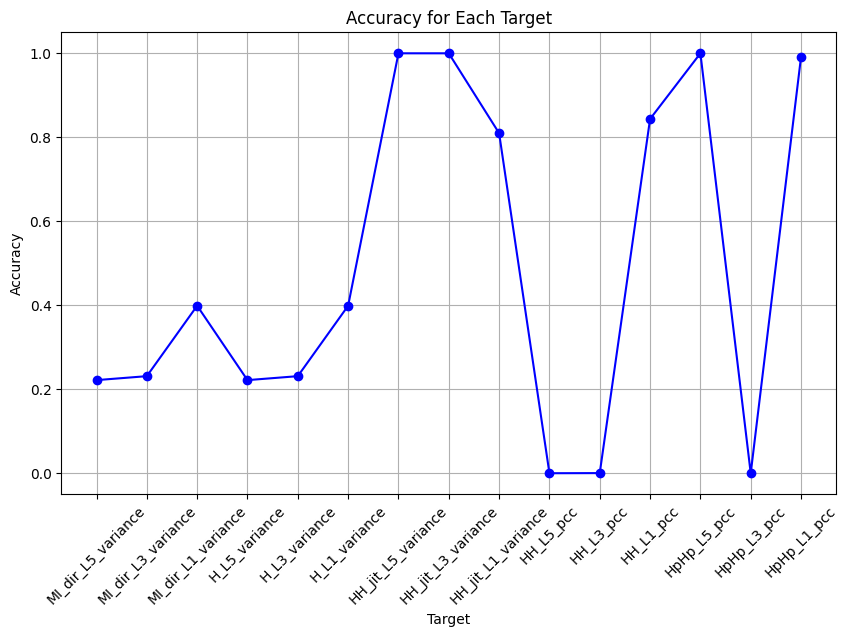

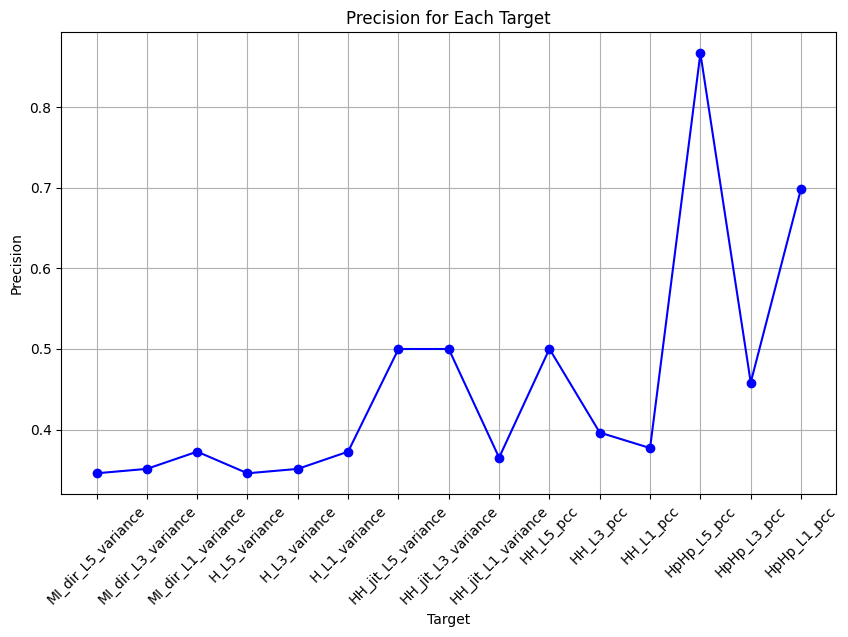

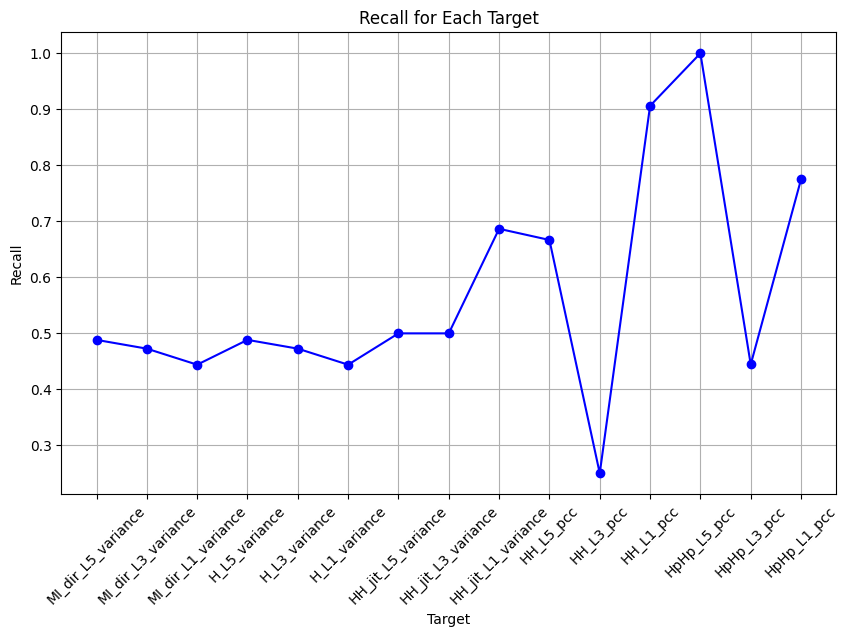

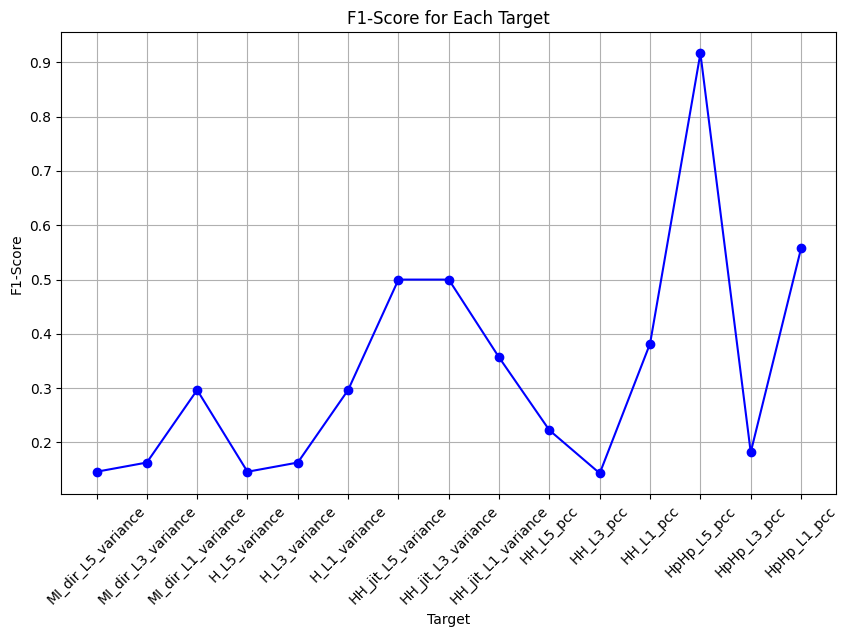

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.971304818624797
Precision: 0.3237682728749323
Recall: 0.3333333333333333
F1-Score: 0.3284811864872288
Test Set Performance:
Accuracy: 0.9695443839844067
Precision: 0.3231814613281356
Recall: 0.3333333333333333
F1-Score: 0.3281789067117507

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.9533026529507309
Precision: 0.31776755098357695
Recall: 0.3333333333333333
F1-Score: 0.325364377613009
Test Set Performance:
Accuracy: 0.9498091448063023
Precision: 0.31660304826876745
Recall: 0.3333333333333333
F1-Score: 0.32475286015772525

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.8785868976719003
Precision: 0.2928622992239668
Recall: 0.3333333333333333
F1-Score: 0.311789994476067
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Accuracy: 0.8571428571428571
Precision: 0.21430311890838208
Recall: 0.24997631454287067
F1-Score: 0.23076923076923075

--------------------------------------------------

Training model for target: H_L5_variance
Validation Set Performance:
Accuracy: 0.971304818624797
Precision: 0.3237682728749323
Recall: 0.3333333333333333
F1-Score: 0.3284811864872288
Test Set Performance:
Accuracy: 0.9695443839844067
Precision: 0.3231814613281356
Recall: 0.3333333333333333
F1-Score: 0.3281789067117507

--------------------------------------------------

Training model for target: H_L3_variance
Validation Set Performance:
Accuracy: 0.9533026529507309
Precision: 0.31776755098357695
Recall: 0.3333333333333333
F1-Score: 0.325364377613009
Test Set Performance:
Accuracy: 0.9498091448063023
Precision: 0.31660304826876745
Recall: 0.3333333333333333
F1-Score: 0.32475286015772525

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Validation Set Performance:
Accuracy: 0.16783974011911207
Precision: 0.3333333333333333
Recall: 0.055961729397960104
F1-Score: 0.09583429940489992
Test Set Performance:
Accuracy: 0.16592219605295216
Precision: 0.3330073349633252
Recall: 0.055316383721874744
F1-Score: 0.09487322373920311

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Validation Set Performance:
Accuracy: 0.16783974011911207
Precision: 0.3333333333333333
Recall: 0.055961729397960104
F1-Score: 0.09583429940489992
Test Set Performance:
Accuracy: 0.16592219605295216
Precision: 0.3330073349633252
Recall: 0.055316383721874744
F1-Score: 0.09487322373920311

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.51367081754196
Precision: 0.3333333333333333
Recall: 0.1712699702139182
F1-Score: 0.22627671943475539
Test Set Performance:
Accuracy: 0.5079184601640543
Precision: 0.24976038338658146
Re

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Validation Set Performance:
Accuracy: 0.9991878722252301
Precision: 0.3330626240750767
Recall: 0.3333333333333333
F1-Score: 0.3331979237192507
Test Set Performance:
Accuracy: 0.0003248599041663283
Precision: 0.00010828663472210943
Recall: 0.3333333333333333
F1-Score: 0.00021650293632107388

--------------------------------------------------

Training model for target: HH_L3_pcc
Validation Set Performance:
Accuracy: 0.9986464537087169
Precision: 0.33288215123623893
Recall: 0.3333333333333333
F1-Score: 0.33310758950742697
Test Set Performance:
Accuracy: 0.0003248599041663283
Precision: 0.333414554905783
Recall: 0.3333604203911371
F1-Score: 0.00021657328659166635

--------------------------------------------------

Training model for target: HH_L1_pcc
Validation Set Performance:
Accuracy: 0.9975636166756903
Precision: 0.999187322226737
Recall: 0.48333333333333334
F1-Score: 0.5773709429527168
Test Set Performance:
Accuracy: 0.9986193454072931
Precision: 0.49967503452758144
Recall: 0.3125
F

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Accuracy: 0.8315601396897588
Precision: 0.24990237235185003
Recall: 0.20795759200584937
F1-Score: 0.22700869102518625

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:
Accuracy: 0.9993232268543584
Precision: 0.6664410450791932
Recall: 0.4166666666666667
F1-Score: 0.46655381768117904
Test Set Performance:
Accuracy: 0.00040607488020791033
Precision: 0.6667478948365959
Recall: 0.4444715293013009
F1-Score: 0.1668832487406103

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Validation Set Performance:
Accuracy: 0.9983757444504602
Precision: 0.9994582148178247
Recall: 0.5499999999999999
F1-Score: 0.6568717442243267
Test Set Performance:
Accuracy: 0.9989442053114594
Precision: 0.4164432529043789
Recall: 0.2954342185987035
F1-Score: 0.3213066598550994

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.6148623406156096
Average Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


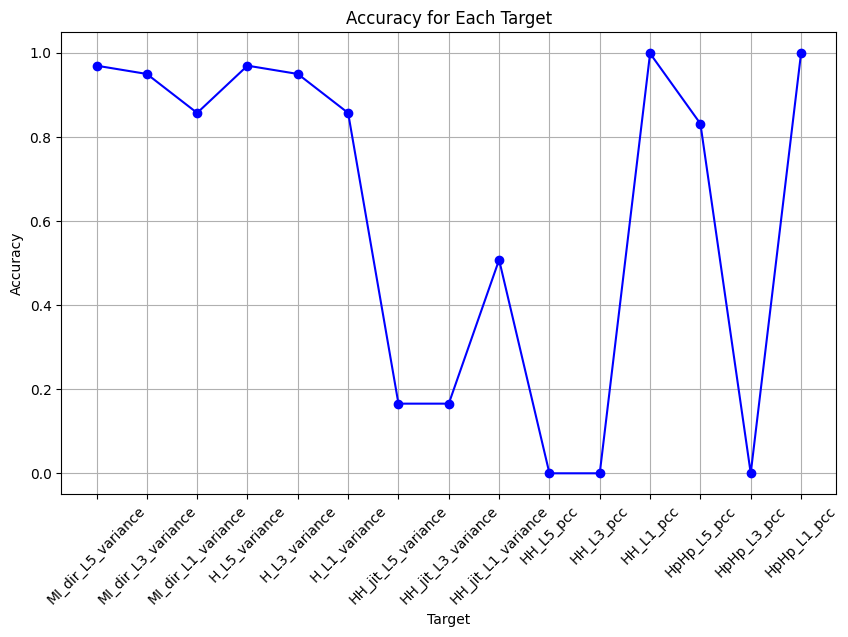

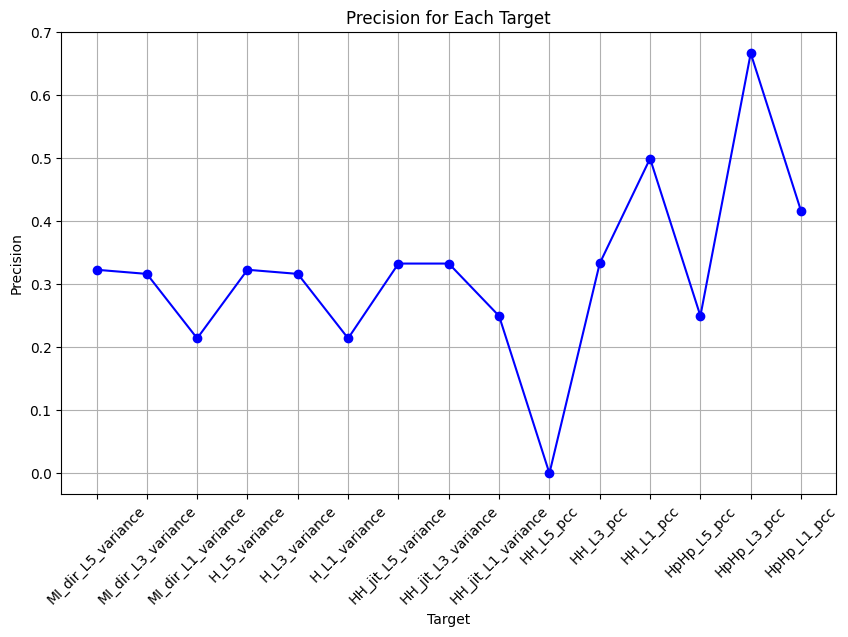

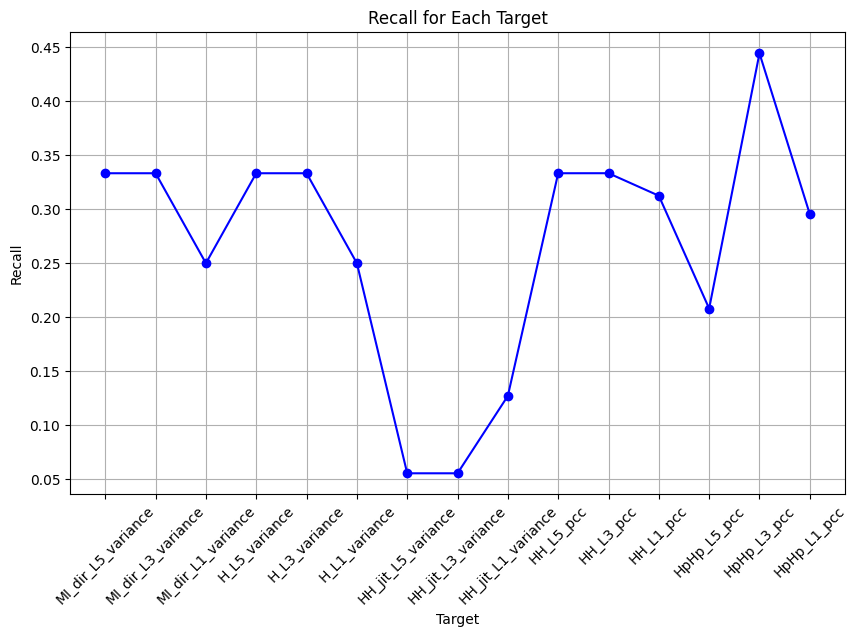

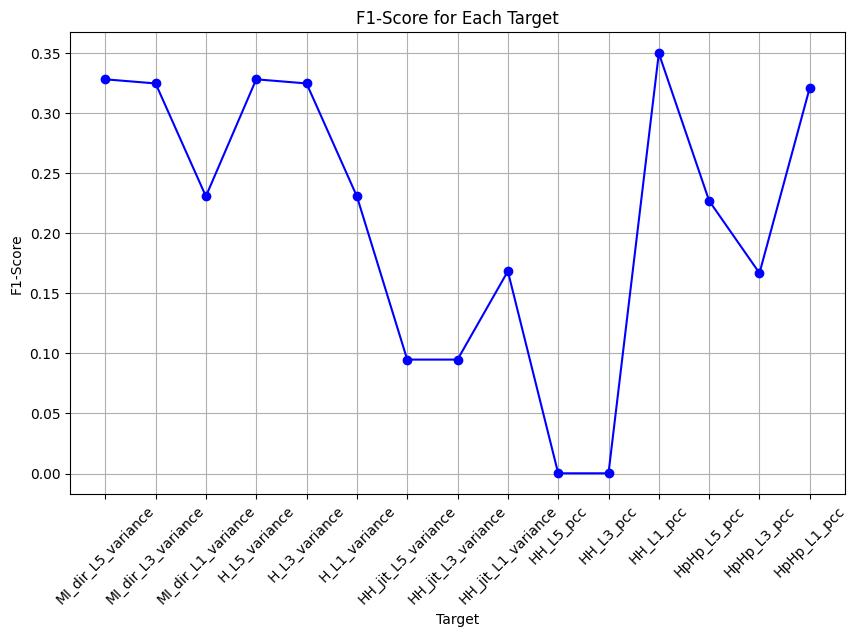

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97038917 0.97021997 0.97005076 0.97021997 0.97004569]
Mean Cross-Validation Accuracy: 0.9701851115293744
Validation Set Performance:
Accuracy: 0.9710341093665403
Precision: 0.3237656828233595
Recall: 0.333240431066518
F1-Score: 0.32843473881792795
Test Set Performance:
Accuracy: 0.9694631690083652
Precision: 0.323180636777128
Recall: 0.3333054112916736
F1-Score: 0.3281649484536083

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.9500846  0.95143824 0.95059222 0.95076142 0.95024539]
Mean Cross-Validation Accuracy: 0.9506243737864091
Validation Set Performance:
Accuracy: 0.9522198159177044
Precision: 0.2662184557438795
Recall: 0.25064578482866146
F1-Score: 0.24579686875650877
Test Set Performance:
Accuracy: 0.949078210021928
Precision: 0.2374817102910096
Recall: 0.24980761008978195
F1-Score: 0.24348876942951203

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.85972927 0.86277496 0.85871404 0.86108291 0.86038247]
Mean Cross-Validation Accuracy: 0.8605367303711479
Validation Set Performance:
Accuracy: 0.8710070384407147
Precision: 0.2851077593891512
Recall: 0.25584386922249525
F1-Score: 0.248705855880209
Test Set Performance:
Accuracy: 0.8488589295866158
Precision: 0.26146073546367976
Recall: 0.25323281292520433
F1-Score: 0.24082576868793726

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97038917 0.97021997 0.97005076 0.97021997 0.97004569]
Mean Cross-Validation Accuracy: 0.9701851115293744
Validation Set Performance:
Accuracy: 0.9710341093665403
Precision: 0.3237656828233595
Recall: 0.333240431066518
F1-Score: 0.32843473881792795
Test Set Performance:
Accuracy: 0.9694631690083652
Precision: 0.323180636777128
Recall: 0.3333054112916736
F1-Score: 0.3281649484536083

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.9500846  0.95143824 0.95059222 0.95076142 0.95024539]
Mean Cross-Validation Accuracy: 0.9506243737864091
Validation Set Performance:
Accuracy: 0.9522198159177044
Precision: 0.2662184557438795
Recall: 0.25064578482866146
F1-Score: 0.24579686875650877
Test Set Performance:
Accuracy: 0.949078210021928
Precision: 0.2374817102910096
Recall: 0.24980761008978195
F1-Score: 0.24348876942951203

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.85972927 0.86277496 0.85871404 0.86108291 0.86038247]
Mean Cross-Validation Accuracy: 0.8605367303711479
Validation Set Performance:
Accuracy: 0.8710070384407147
Precision: 0.2851077593891512
Recall: 0.25584386922249525
F1-Score: 0.248705855880209
Test Set Performance:
Accuracy: 0.8488589295866158
Precision: 0.26146073546367976
Recall: 0.25323281292520433
F1-Score: 0.24082576868793726

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [1.        1.        0.9998308 0.9998308 1.       ]
Mean Cross-Validation Accuracy: 0.9999323181049069
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        1.        0.9998308 0.9998308 1.       ]
Mean Cross-Validation Accuracy: 0.9999323181049069
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9998308  0.9998308  0.9998308  0.9998308  0.99983077]
Mean Cross-Validation Accuracy: 0.9998307895352496
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9995127101437505
Precision: 0.33317090338125016
Recall: 0.3333333333333333
F1-Score: 0.33325209856485244

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9998308  0.9998308  0.9998308  0.9998308  0.99983077]
Mean Cross-Validation Accuracy: 0.9998307895352496
Validation Set Performance:
Accuracy: 0.9991878722252301
Precision: 0.3330626240750767
Recall: 0.3333333333333333
F1-Score: 0.3331979237192507
Test Set Performance:
Accuracy: 0.0003248599041663283
Precision: 0.00010828663472210943
Recall: 0.3333333333333333
F1-Score: 0.00021650293632107388

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99932318 0.99881557 0.99915398 0.99932318 0.99881537]
Mean Cross-Validation Accuracy: 0.9990862543271198
Validation Set Performance:
Accuracy: 0.9986464537087169
Precision: 0.37476300108342364
Recall: 0.31246611547844944
F1-Score: 0.33319785033644944
Test Set Performance:
Accuracy: 0.00016242995208316414
Precision: 4.062398440038999e-05
Recall: 0.16666666666666666
F1-Score: 8.12281699293315e-05

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99763113 0.99881557 0.99847716 0.99898477 0.99830767]
Mean Cross-Validation Accuracy: 0.9984432591426826
Validation Set Performance:
Accuracy: 0.9971575527883053
Precision: 0.49976248642779586
Recall: 0.43736422267481334
F1-Score: 0.46409905847902183
Test Set Performance:
Accuracy: 0.9974011207666694
Precision: 0.4997965825874695
Recall: 0.2809856218986415
F1-Score: 0.3053216540789253

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9998308  0.99949239 0.99966159 0.99966159 1.        ]
Mean Cross-Validation Accuracy: 0.9997292724196278
Validation Set Performance:
Accuracy: 0.0004060638873849486
Precision: 0.3334235819683227
Recall: 0.3333784759841098
F1-Score: 0.00027072149036462583
Test Set Performance:
Accuracy: 0.9997563550718752
Precision: 0.5555013990432349
Recall: 0.5555284750995207
F1-Score: 0.5555149365214762

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99949239 0.99898477 0.99949239 0.99915398 0.99915383]
Mean Cross-Validation Accuracy: 0.9992554705188879
Validation Set Performance:
Accuracy: 0.9990525175961018
Precision: 0.34993225850155807
Recall: 0.499898401517204
F1-Score: 0.3927724717198402
Test Set Performance:
Accuracy: 0.0002436449281247462
Precision: 0.2500406272852848
Recall: 0.16668698030930906
F1-Score: 0.00012185875288129981

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99898477 0.99949239 0.99864636 0.99932318 0.9989846 ]
Mean Cross-Validation Accuracy: 0.9990862600541375
Validation Set Performance:
Accuracy: 0.9979696805630752
Precision: 0.4497966101694916
Recall: 0.4499321665988333
F1-Score: 0.44986436999864376
Test Set Performance:
Accuracy: 0.9982132705270852
Precision: 0.49989833265555106
Recall: 0.3331503916307559
F1-Score: 0.3748576888672034

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7686726765748938
Average Precision: 0.3188426993788976
Average Recall: 0.322825098058992
Average F1-Score: 0.2796162479640837


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

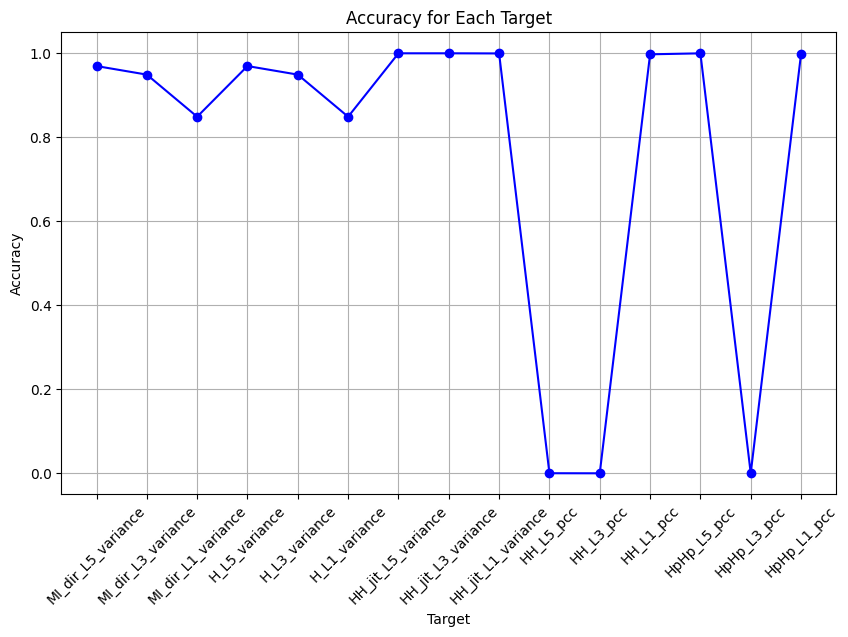

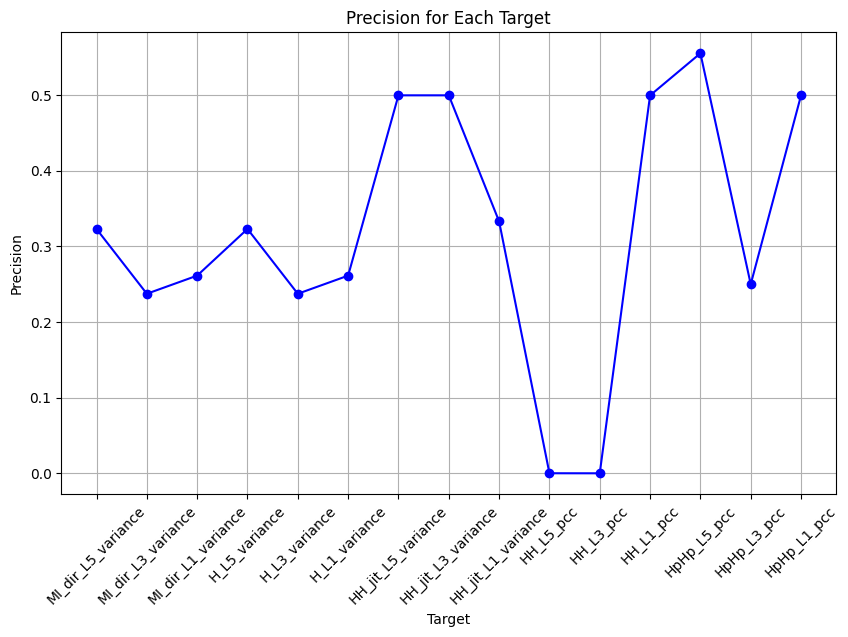

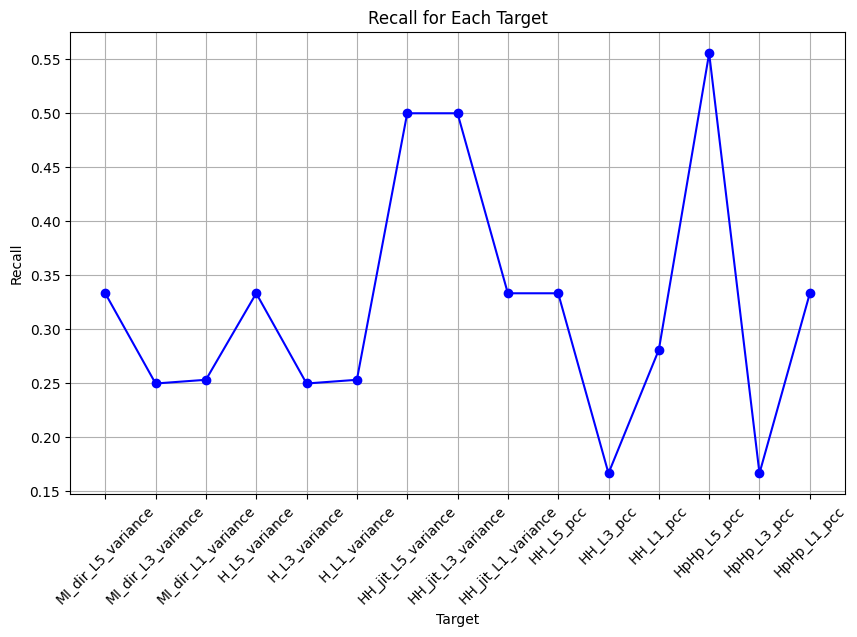

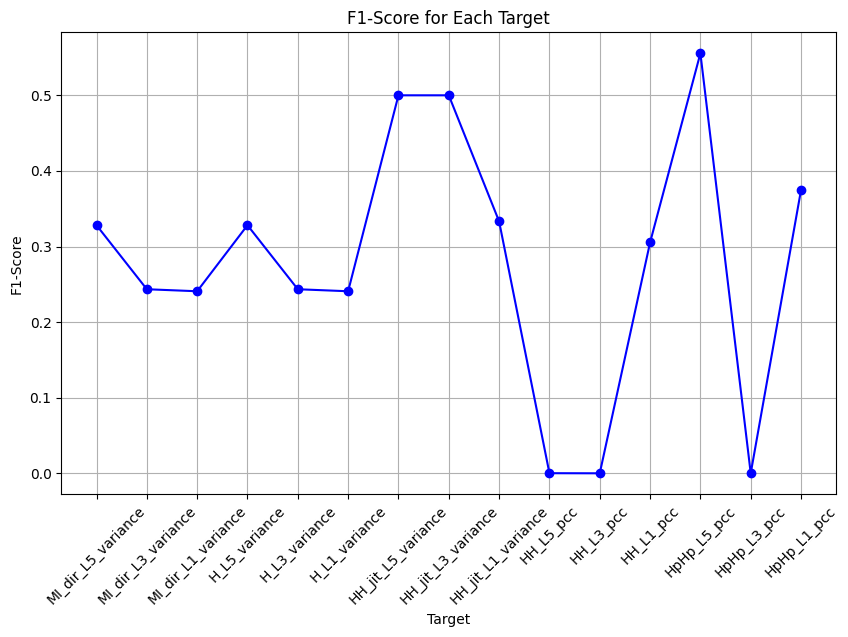

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.81658206 0.82013536 0.8177665  0.81675127 0.01641564]
Mean Cross-Validation Accuracy: 0.6575301663498194
Validation Set Performance:
Accuracy: 0.8144288034650785
Precision: 0.32907996217104213
Recall: 0.3651475336257945
F1-Score: 0.3098210505967019
Test Set Performance:
Accuracy: 0.8182408836189393
Precision: 0.33141966397488926
Recall: 0.38307240920192925
F1-Score: 0.3149405303830876

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.64027073 0.66260575 0.63857868 0.63282572 0.0198003 ]
Mean Cross-Validation Accuracy: 0.5188162368969415
Validation Set Performance:
Accuracy: 0.6280454791553871
Precision: 0.3244350793607005
Recall: 0.44166454789900794
F1-Score: 0.2721251333180391
Test Set Performance:
Accuracy: 0.62884755948997
Precision: 0.3266875787460734
Recall: 0.410649712449489
F1-Score: 0.27630847821201726

--------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.99932318 0.99864636 0.99864636 0.99780034 0.99813843]
Mean Cross-Validation Accuracy: 0.9985109353107579
Validation Set Performance:
Accuracy: 0.9989171629669734
Precision: 0.40740740740740744
Recall: 0.6663056232511959
F1-Score: 0.45436483502048386
Test Set Performance:
Accuracy: 0.9987005603833347
Precision: 0.3331707713565797
Recall: 0.333062484764768
F1-Score: 0.3331166192604632

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Cross-Validation Accuracy Scores: [0.99966159 0.99898477 0.99898477 0.99864636 0.99813843]
Mean Cross-Validation Accuracy: 0.9988831857337699
Validation Set Performance:
Accuracy: 0.0002707092582566324
Precision: 0.041711833785004516
Recall: 0.25
F1-Score: 0.06675695196821958
Test Set Performance:
Accuracy: 0.0003248599041663283
Precision: 0.38100655947059847
Recall: 0.5000270826562669
F1-Score: 0.08349581606954261

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.99966159 0.99864636 0.99915398 0.99932318 0.9984769 ]
Mean Cross-Validation Accuracy: 0.9990524019255378
Validation Set Performance:
Accuracy: 0.9989171629669734
Precision: 0.6998644435407346
Recall: 0.7498192825517304
F1-Score: 0.7220640837380925
Test Set Performance:
Accuracy: 0.0004872898562494924
Precision: 0.4583604269961256
Recall: 0.36116528522671865
F1-Score: 0.1668291714073419

--------------------------------------------------

Training mod

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99729272 0.99763113 0.99746193 0.99796954 0.9979692 ]
Mean Cross-Validation Accuracy: 0.997664905895077
Validation Set Performance:
Accuracy: 0.9976989713048187
Precision: 0.8251251969844935
Recall: 0.7218601493550576
F1-Score: 0.7404238839600056
Test Set Performance:
Accuracy: 0.9981320555510436
Precision: 0.7929677593833548
Recall: 0.680148820015004
F1-Score: 0.5859979286641824

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.99949239 0.99847716 0.99949239 0.99898477 0.99813843]
Mean Cross-Validation Accuracy: 0.9989170266813163
Validation Set Performance:
Accuracy: 0.0006767731456415809
Precision: 0.4444444444444444
Recall: 0.33346876128566266
F1-Score: 0.16693741257163486
Test Set Performance:
Accuracy: 0.9995127101437505
Precision: 0.5873015873015873
Recall: 0.9998375172637908
F1-Score: 0.6999187388265886

--------------------------------------------------

Training

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99949239 0.99847716 0.99949239 0.99949239 0.9989846 ]
Mean Cross-Validation Accuracy: 0.9991877828967771
Validation Set Performance:
Accuracy: 0.9991878722252301
Precision: 0.6333333333333333
Recall: 0.9164408922604533
F1-Score: 0.7236965983629037
Test Set Performance:
Accuracy: 0.0004872898562494924
Precision: 0.4583604269961256
Recall: 0.4444986141581575
F1-Score: 0.1819806777579289

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Cross-Validation Accuracy Scores: [0.99763113 0.99813875 0.99898477 0.99864636 0.99779997]
Mean Cross-Validation Accuracy: 0.9982401962763504
Validation Set Performance:
Accuracy: 0.9978343259339469
Precision: 0.6218880321986228
Recall: 0.7273707773707775
F1-Score: 0.6663952225841476
Test Set Performance:
Accuracy: 0.9982944855031268
Precision: 0.5199728622214986
Recall: 0.7167109751059666
F1-Score: 0.5830892522984298

--------------------------------------------------

Overall 

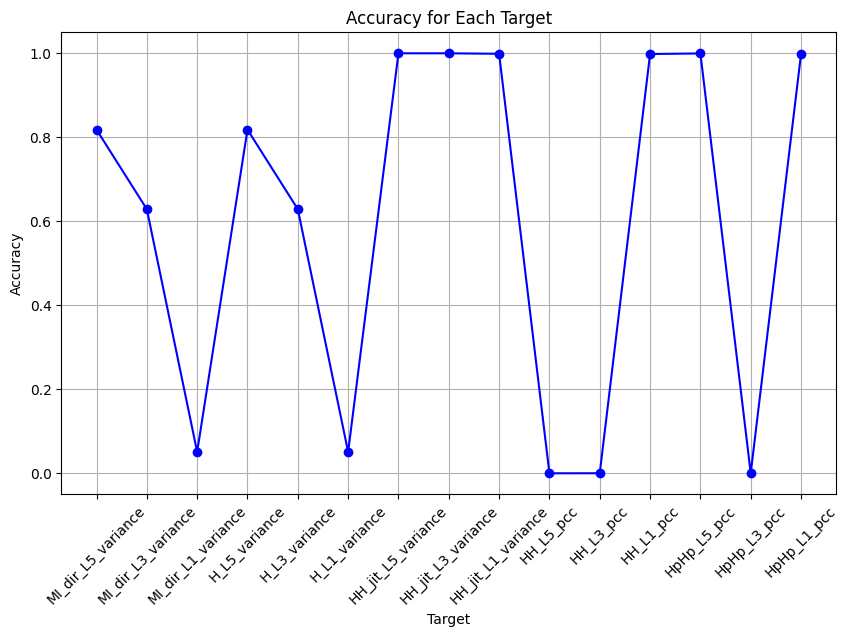

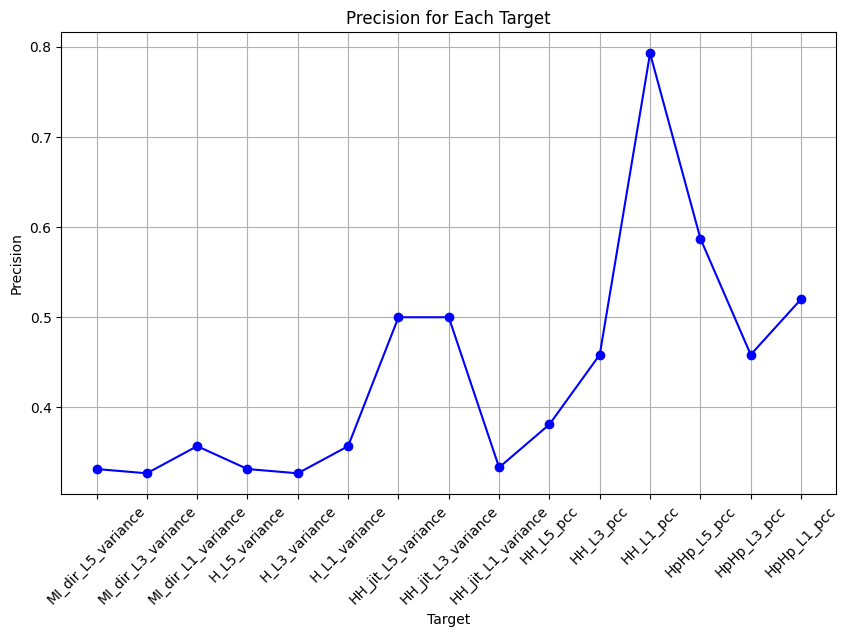

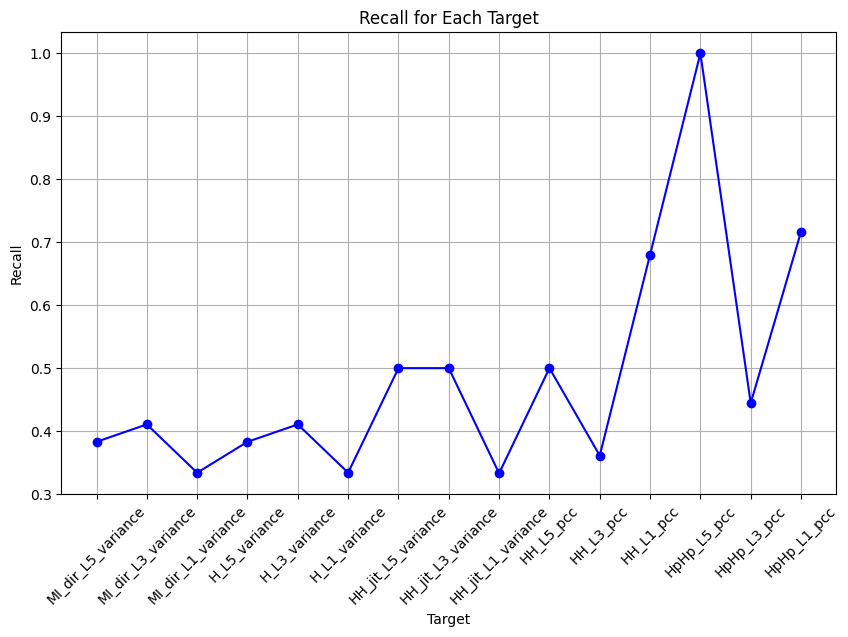

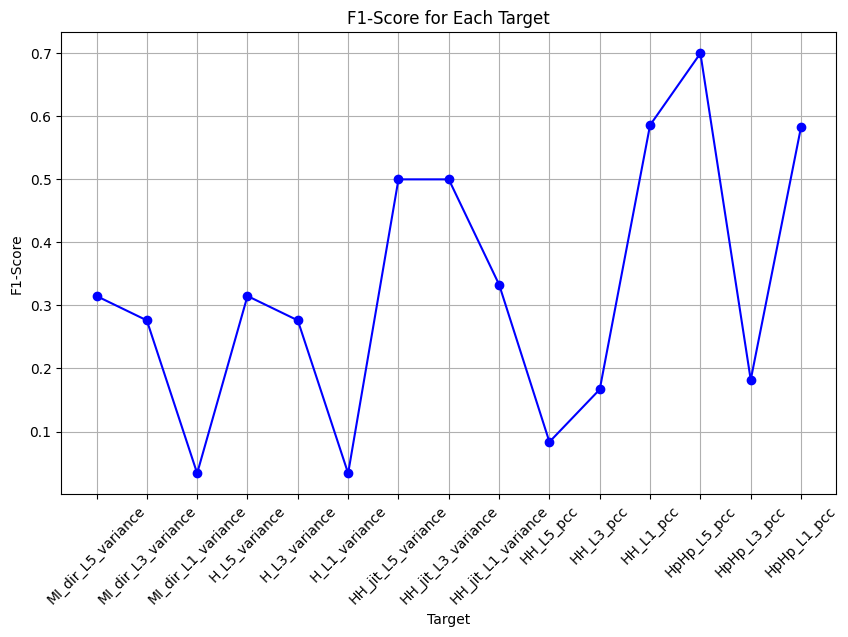

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.95972927 0.96108291 0.96125212 0.957022   0.96023016]
Mean Cross-Validation Accuracy: 0.9598632903606561
Validation Set Performance:
Accuracy: 0.9622360584731998
Precision: 0.3668042623525674
Recall: 0.3460542677933982
F1-Score: 0.3500768311656896
Test Set Performance:
Accuracy: 0.9602858767156663
Precision: 0.3342796535513943
Recall: 0.3337821272678619
F1-Score: 0.33215269774039996

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.93384095 0.93401015 0.93502538 0.93434856 0.93450668]
Mean Cross-Validation Accuracy: 0.9343463454038823
Validation Set Performance:
Accuracy: 0.9389550622631294
Precision: 0.36545202345364886
Recall: 0.3457815751318454
F1-Score: 0.3489752937234247
Test Set Performance:
Accuracy: 0.9355153090229839
Precision: 0.3323514077163712
Recall: 0.33303555261026946
F1-Score: 0.32971649882456305

------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/pytho

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Cross-Validation Accuracy Scores: [1.         0.99966159 0.9998308  0.9998308  0.99983077]
Mean Cross-Validation Accuracy: 0.9998307895352496
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9994314951677089
Precision: 0.33317089018843404
Recall: 0.3333062484764768
F1-Score: 0.33323855558714816

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.99966159 0.9998308  0.9998308  0.99932318 0.99966153]
Mean Cross-Validation Accuracy: 0.9996615790704994


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Set Performance:
Accuracy: 0.9994585814834868
Precision: 0.6664861449589313
Recall: 0.6666666666666666
F1-Score: 0.6665763813651138
Test Set Performance:
Accuracy: 0.0005685048322910744
Precision: 0.6667749796913078
Recall: 0.6667208319792005
F1-Score: 0.33365820203985425

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.99966159 0.99932318 0.99966159 0.99966159 0.99932307]
Mean Cross-Validation Accuracy: 0.9995262038262778
Validation Set Performance:
Accuracy: 0.9993232268543584
Precision: 0.6824945031776152
Recall: 0.694399265082377
F1-Score: 0.6849365056196176
Test Set Performance:
Accuracy: 0.0003248599041663283
Precision: 0.1666937515235232
Recall: 0.3611111111111111
F1-Score: 0.2000541565123206

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99830795 0.99881557 0.99864636 0.99881557 0.99864613]
Mean Cross-Validation Accuracy: 0.9986463162819972
Validation Set Performance:
Accuracy: 0.9991878722252301
Precision: 0.999728666395333
Recall: 0.8277777777777778
F1-Score: 0.9009631790576416
Test Set Performance:
Accuracy: 0.9982944855031268
Precision: 0.8131434152694124
Recall: 0.721842602384374
F1-Score: 0.6645800689008305

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.9998308  0.99932318 0.9998308  0.9998308  0.99983077]
Mean Cross-Validation Accuracy: 0.99972926669261
Validation Set Performance:
Accuracy: 0.0005414185165132648
Precision: 0.5000902730760551
Recall: 0.5000451426507765
F1-Score: 0.22249298034606868
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.8666666666666667
Recall: 0.9999458390879302
F1-Score: 0.9166395840103997

--------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores: [0.9998308  0.99898477 0.99966159 0.99949239 0.99966153]
Mean Cross-Validation Accuracy: 0.9995262152803133
Validation Set Performance:
Accuracy: 0.9994585814834868
Precision: 0.5555555555555555
Recall: 0.6665763569041814
F1-Score: 0.5999548390010387
Test Set Performance:
Accuracy: 0.00040607488020791033
Precision: 0.5000270870578037
Recall: 0.444471529301301
F1-Score: 0.22233054844682584

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Cross-Validation Accuracy Scores: [0.99881557 0.9998308  0.99949239 0.99949239 0.99932307]
Mean Cross-Validation Accuracy: 0.9993908400360917
Validation Set Performance:
Accuracy: 0.9989171629669734
Precision: 0.9330170349283811
Recall: 0.7666214443992222
F1-Score: 0.8220414067444174
Test Set Performance:
Accuracy: 0.9994314951677089
Precision: 0.9046805907271024
Recall: 0.7473663375769237
F1-Score: 0.7665718041495575

--------------------

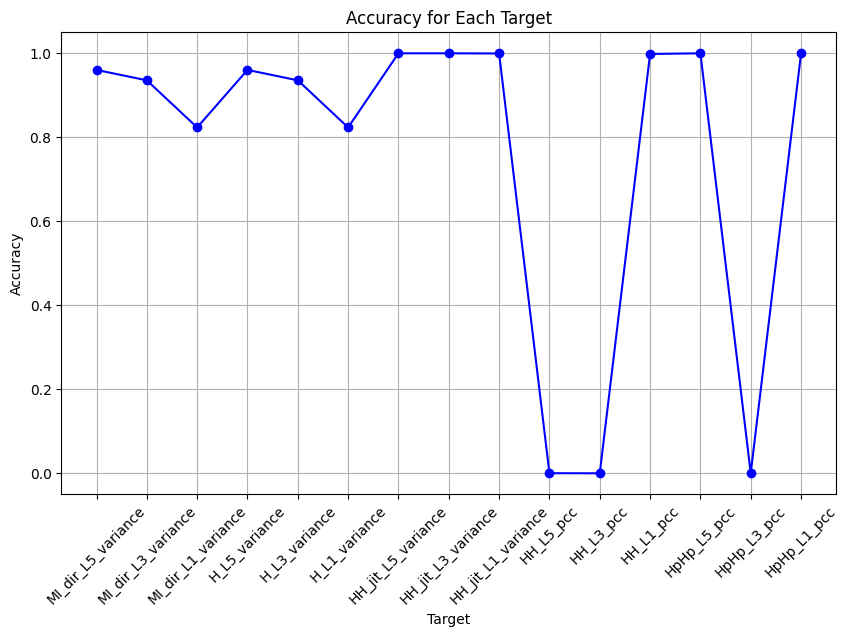

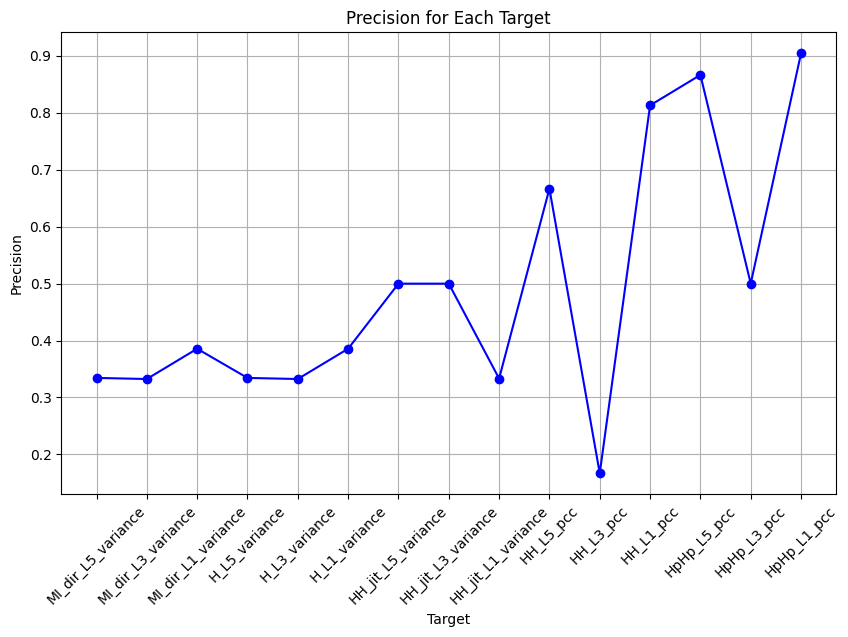

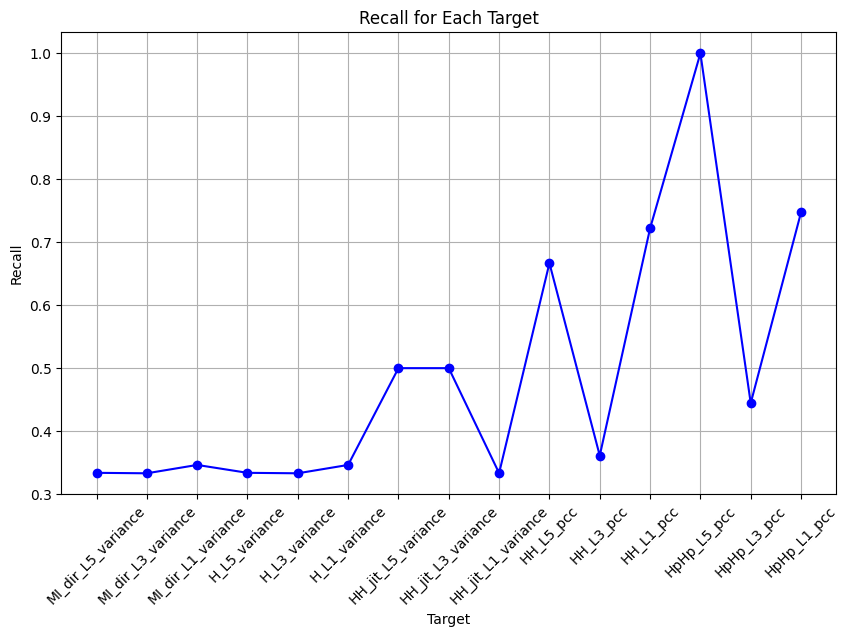

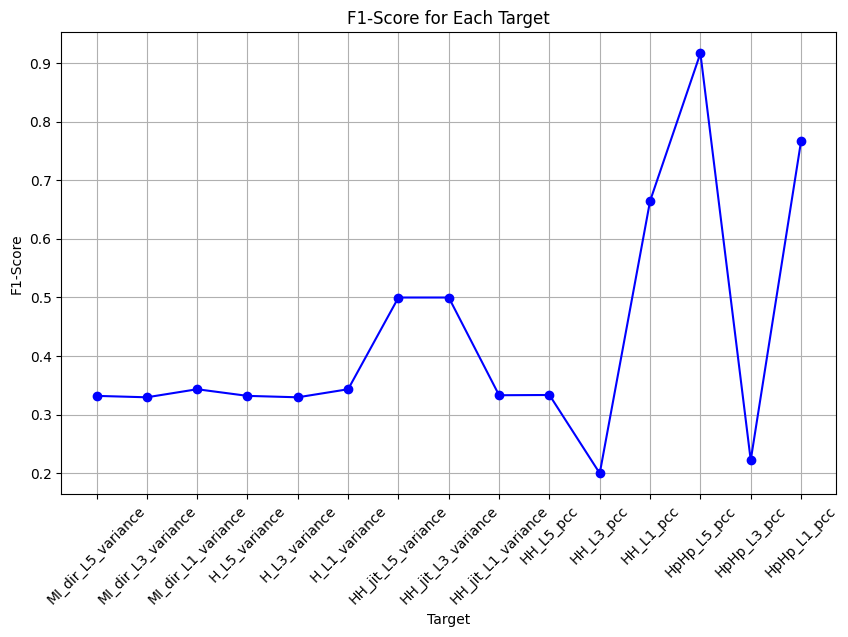

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Random Forest model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.96277496 0.96362098 0.96395939 0.96108291 0.96310712]
Mean Cross-Validation Accuracy: 0.9629090729991446
Validation Set Performance:
Accuracy: 0.9644017325392529
Precision: 0.37801923209775445
Recall: 0.34679748592792076
F1-Score: 0.35194343930202304
Test Set Performance:
Accuracy: 0.9623162511167059
Precision: 0.3371511543074333
Recall: 0.33448017830935406
F1-Score: 0.33278064729110063

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.93739425 0.93756345 0.93857868 0.93773266 0.93924522]
Mean Cross-Validation Accuracy: 0.9381028509380425
Validation Set Performance:
Accuracy: 0.9416621548456957
Precision: 0.3709054685353119
Recall: 0.3454884684920115
F1-Score: 0.3487608069330747
Test Set Performance:
Accuracy: 0.9390887679688135
Precision: 0.33688291473050963
Recall: 0.33428964980280185
F1-Score: 0.3307859709544438

---

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9998375700479168
Precision: 0.4999187850239584
Recall: 0.5
F1-Score: 0.4999593892137752

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.9998308  0.9998308  0.99983077]
Mean Cross-Validation Accuracy: 0.9998984714303427
Validation Set Performance:
Accuracy: 0.9997292907417433
Precision: 0.49986464537087166
Recall: 0.5
F1-Score: 0.4999323135237579
Test Set Performance:
Accuracy: 0.9995127101437505
Precision: 0.33317090338125016
Recall: 0.3333333333333333
F1-Score: 0.33325209856485244

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9998308  0.9998308  0.9998308  0.9998308  0.99983077]
Mean Cross-Validation Accuracy: 0.9998307895352496
Validation Set Performance:
Accuracy: 0.9994585814834868
Precision: 0.6664861449589313
Recall: 0.6666666666666666
F1-Score: 0.6665763813651138
Test Set Performance:
Accuracy: 0.0004872898562494924
Precision: 0.6667749708932392
Recall: 0.6666937493229336
F1-Score: 0.3336040323425746

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99966159 0.99932318 0.99966159 0.99966159 0.99966153]
Mean Cross-Validation Accuracy: 0.9995938971754063
Validation Set Performance:
Accuracy: 0.9994585814834868
Precision: 0.9165311653116531
Recall: 0.8055103761934882
F1-Score: 0.8499096535212539
Test Set Performance:
Accuracy: 0.00040607488020791033
Precision: 0.2500541609120697
Recall: 0.47222222222222215
F1-Score: 0.25010829542993285

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99864636 0.99898477 0.99881557 0.99881557 0.99881537]
Mean Cross-Validation Accuracy: 0.9988155267467475
Validation Set Performance:
Accuracy: 0.9991878722252301
Precision: 0.999728666395333
Recall: 0.8277777777777778
F1-Score: 0.9009631790576416
Test Set Performance:
Accuracy: 0.9983757004791683
Precision: 0.8258699602920486
Recall: 0.6802301671231143
F1-Score: 0.6166600157813241

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.9998308  0.99966159 0.9998308  0.9998308  1.        ]
Mean Cross-Validation Accuracy: 0.9998307952622675
Validation Set Performance:
Accuracy: 0.0004060638873849486
Precision: 0.333423594187201
Recall: 0.5
F1-Score: 0.22240269506105995
Test Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores: [0.9998308  0.99932318 0.9998308  0.99966159 0.99966153]
Mean Cross-Validation Accuracy: 0.9996615790704994
Validation Set Performance:
Accuracy: 0.9993232268543584
Precision: 0.6665312203711228
Recall: 0.583243023570848
F1-Score: 0.6189347394901069
Test Set Performance:
Accuracy: 0.0004872898562494924
Precision: 0.5833874986458673
Recall: 0.5555826404124121
F1-Score: 0.285876755253392

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Cross-Validation Accuracy Scores: [0.999323

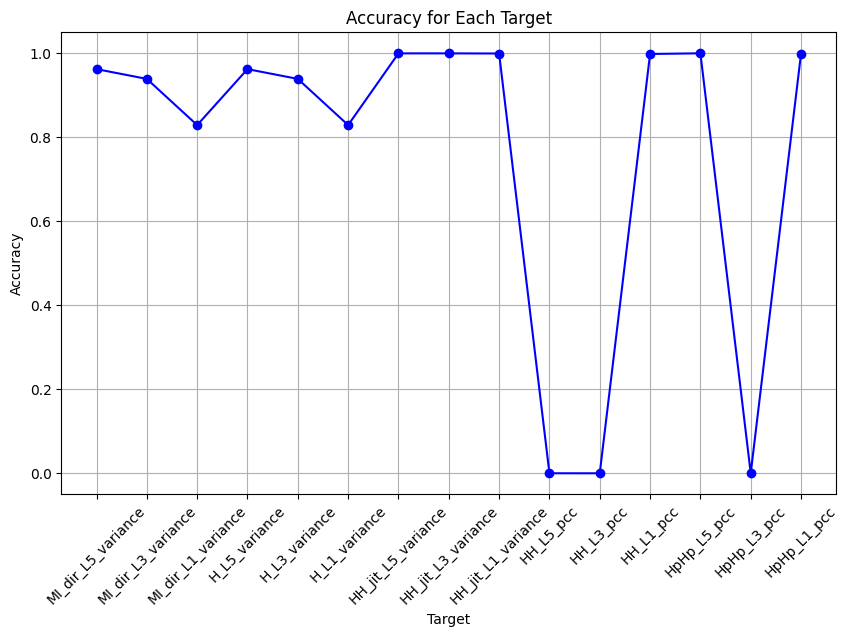

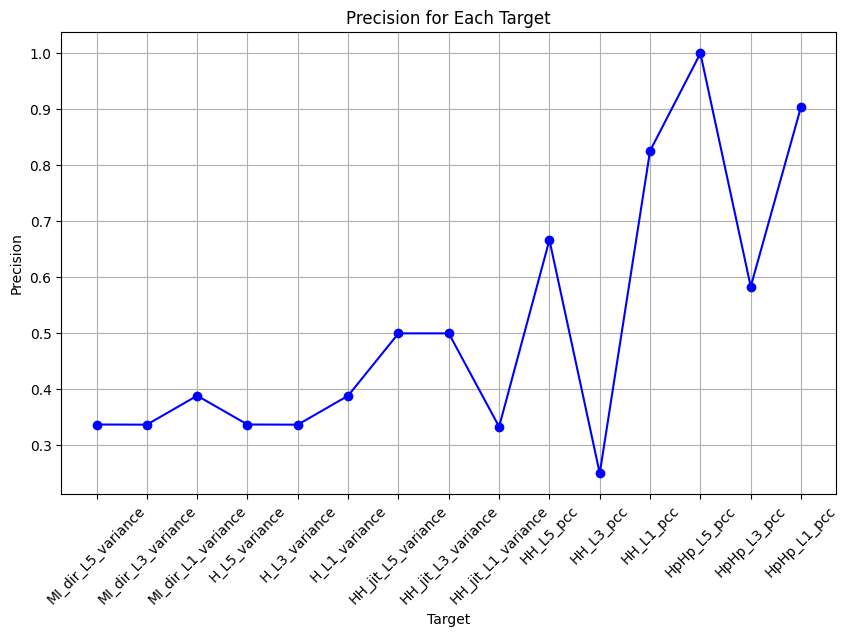

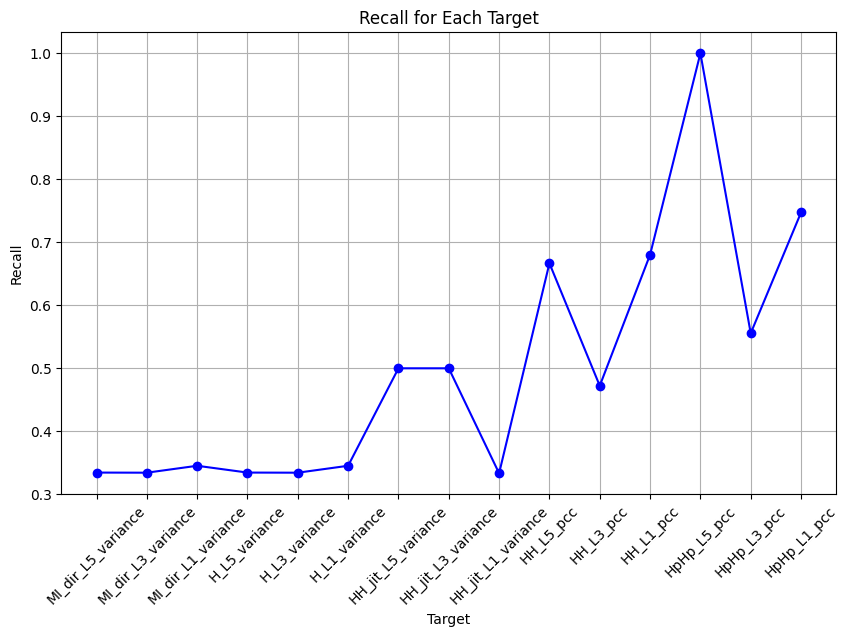

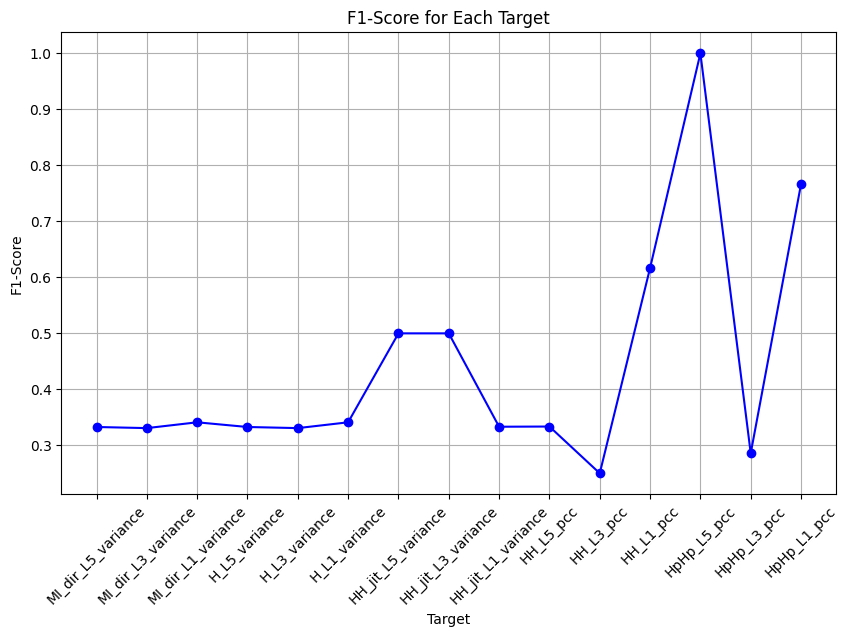

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

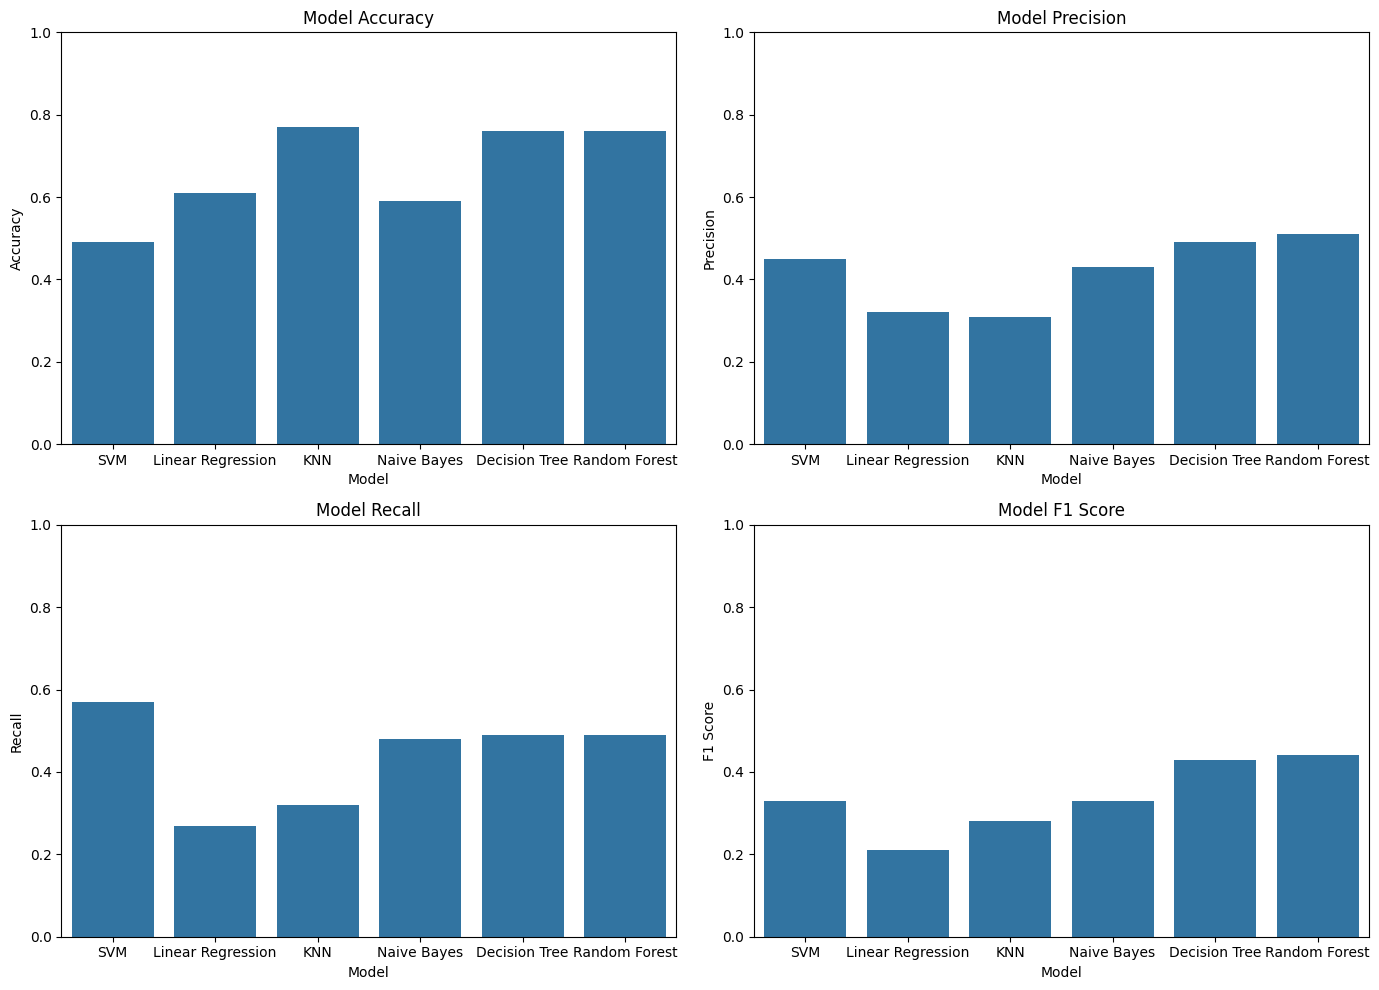

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.49, 0.61, 0.77, 0.59, 0.76, 0.76],
    'Precision': [0.45, 0.32, 0.31,0.43 ,0.49, 0.51],
    'Recall': [0.57, 0.27, 0.32, 0.48, 0.49, 0.49],
    'F1 Score': [0.33, 0.21, 0.28, 0.33, 0.43, 0.44]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()